#Assignment 1 - Life Expectancy Prediction

# Executive Summary

This report investigates life expectancy prediction using health indicators and socioeconomic factors. We compared Polynomial Ridge Regression and Lasso Regression, finding that Polynomial Ridge Regression outperforms in accuracy and robustness, showcasing higher R-squared values and lower mean squared errors. However, challenges include potential overfitting with high-degree polynomials and interpretability issues due to feature transformations.

The success of Polynomial Ridge Regression highlights its potential for guiding public health policies and resource allocation by identifying key factors influencing life expectancy. This approach advances beyond traditional analysis, offering precise and actionable insights for improving healthcare outcomes.

# Introduction



Exploring life expectancy through regression analysis offers insights into how health, socioeconomic factors, and other variables affect longevity. This report aims to predict life expectancy, providing valuable data to inform health policies and improve overall health outcomes.

**Objective:** To predict life expectancy(years)

# Data

- Data: Global Health and Life Expectancy Dataset from WHO
- Dataset: 2,071 entries with 22 features (2071 rows × 24 columns including ID, Target)
- Types of data: Categorical = 12, Numerical = 12


# Table of Contents
* 1. Data Retrieval
* 2. Exploratory Data Analysis (EDA)
  - 2.1 Data Distribution
    - 2.1.1 Histogram
    - 2.1.2 Boxplot
  - 2.2 Relationship between variables
* 3. Data Splitting
* 4. Data pre-process
  - 4.1 Feature Scaling
  - 4.2 Feature Importance
    - 4.2.1 Permutation
    - 4.2.2 Coefficient Importance
* 5. Data Modelling
  - 5.1 Baseline Model: Linear Regression Model
    - Model 1.1: Linear Regression Model
    - Model 1.2: Linear Ridge Regression Model
  - 5.2 Advanced Model: Polynomial Regression Model
    - Model 2.1: Polynomial Regression Model
    - Model 2.2: Polynomial Ridge Regression Model
* 6. Conclusion
* 7. Reference

## Data Retrieval <a class="anchor" id="data-retrieval"></a>

In [1688]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1689]:
from google.colab import drive
drive .mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1690]:
!cp /content/drive/'My Drive'/ML_Assignment1/dataset/train.csv .

In [1691]:
!cp /content/drive/'My Drive'/ML_Assignment1/dataset/test.csv .

#### Read train.csv and test.csv into dataframe


In [1692]:
train_df = pd.read_csv('train.csv', delimiter=',')

In [1693]:
print(train_df)

        ID  TARGET_LifeExpectancy  Country  Year  Status  AdultMortality  \
0        1                   67.1      146  2017       0             263   
1        2                   59.8      146  2016       0             271   
2        3                   57.6      146  2015       0             268   
3        4                   55.5      146  2014       0             272   
4        5                   57.7      146  2013       0             275   
...    ...                    ...      ...   ...     ...             ...   
2066  2067                   47.7       61  2006       0             578   
2067  2068                   46.0       61  2005       0              64   
2068  2069                   46.2       61  2004       0              69   
2069  2070                   47.1       61  2003       0             611   
2070  2071                   41.1       61  2002       0             614   

      AdultMortality-Male  AdultMortality-Female  SLS  Alcohol  ...  Polio  \
0        

In [1694]:
test_df = pd.read_csv('test.csv', delimiter=',')

In [1695]:
print(test_df)

      ID  Country  Year  Status  AdultMortality  AdultMortality-Male  \
0      1      120  2017       0             335                  314   
1      2      120  2016       0             348                  338   
2      3      120  2015       0             355                  362   
3      4      120  2014       0             358                  348   
4      5      120  2013       0             361                  368   
..   ...      ...   ...     ...             ...                  ...   
862  863      155  2006       0             723                  668   
863  864      155  2005       0             715                  742   
864  865      155  2004       0              73                   72   
865  866      155  2003       0             686                  672   
866  867      155  2002       0             665                  614   

     AdultMortality-Female  SLS  Alcohol  PercentageExpenditure  ...  Polio  \
0                      356   66     6.35               0

#### Data Preparation

In [1696]:
train_df.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [1697]:
test_df.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


# Exploratory Data Analysis (EDA)<a class="anchor" id="eda"></a>


In [1698]:
#  see the shape of the dataframe.
train_df.shape

(2071, 24)

There are a total of 24 variables in this dataset, with a total of 2071 observations.

We have a rows and b columns = 22 features + 1 target

#### Make sure there is no redundant white space in train_df

In [1699]:
train_df.columns = train_df.columns.str.strip()


#### Impossible value sanity check for numeric column

In [1700]:
# Example for a range check on the 'Year' column
if (train_df['Year'] > 2024).any():
    print('Year contains values beyond 2024')

### Statistics

In [1701]:
# run describe to compute statistics
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

There is no NaN values

In [1702]:
train_df.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


Observation
* There is a big difference in numbers for features like GDP (which goes from 1.88 to 133,473.47), Population (from 34 to about 1.29 billion), and other features with smaller ranges. This shows that we **need to adjust the scale** of these numbers.
* We see that the **average of TARGET_LifeExpectancy** is **69** years.
* By checking **count**, I see that total count of each feature is the same. Hence, no data is missing

In [1703]:
# show min max of population

train_df['Population'].min(), train_df['Population'].max()


(34, 1293859294)

In [1704]:
# show min max of GDP

print(train_df['GDP'].min(), train_df['GDP'].max())


1.88 133473.47


## Data Distribution

1. Histogram


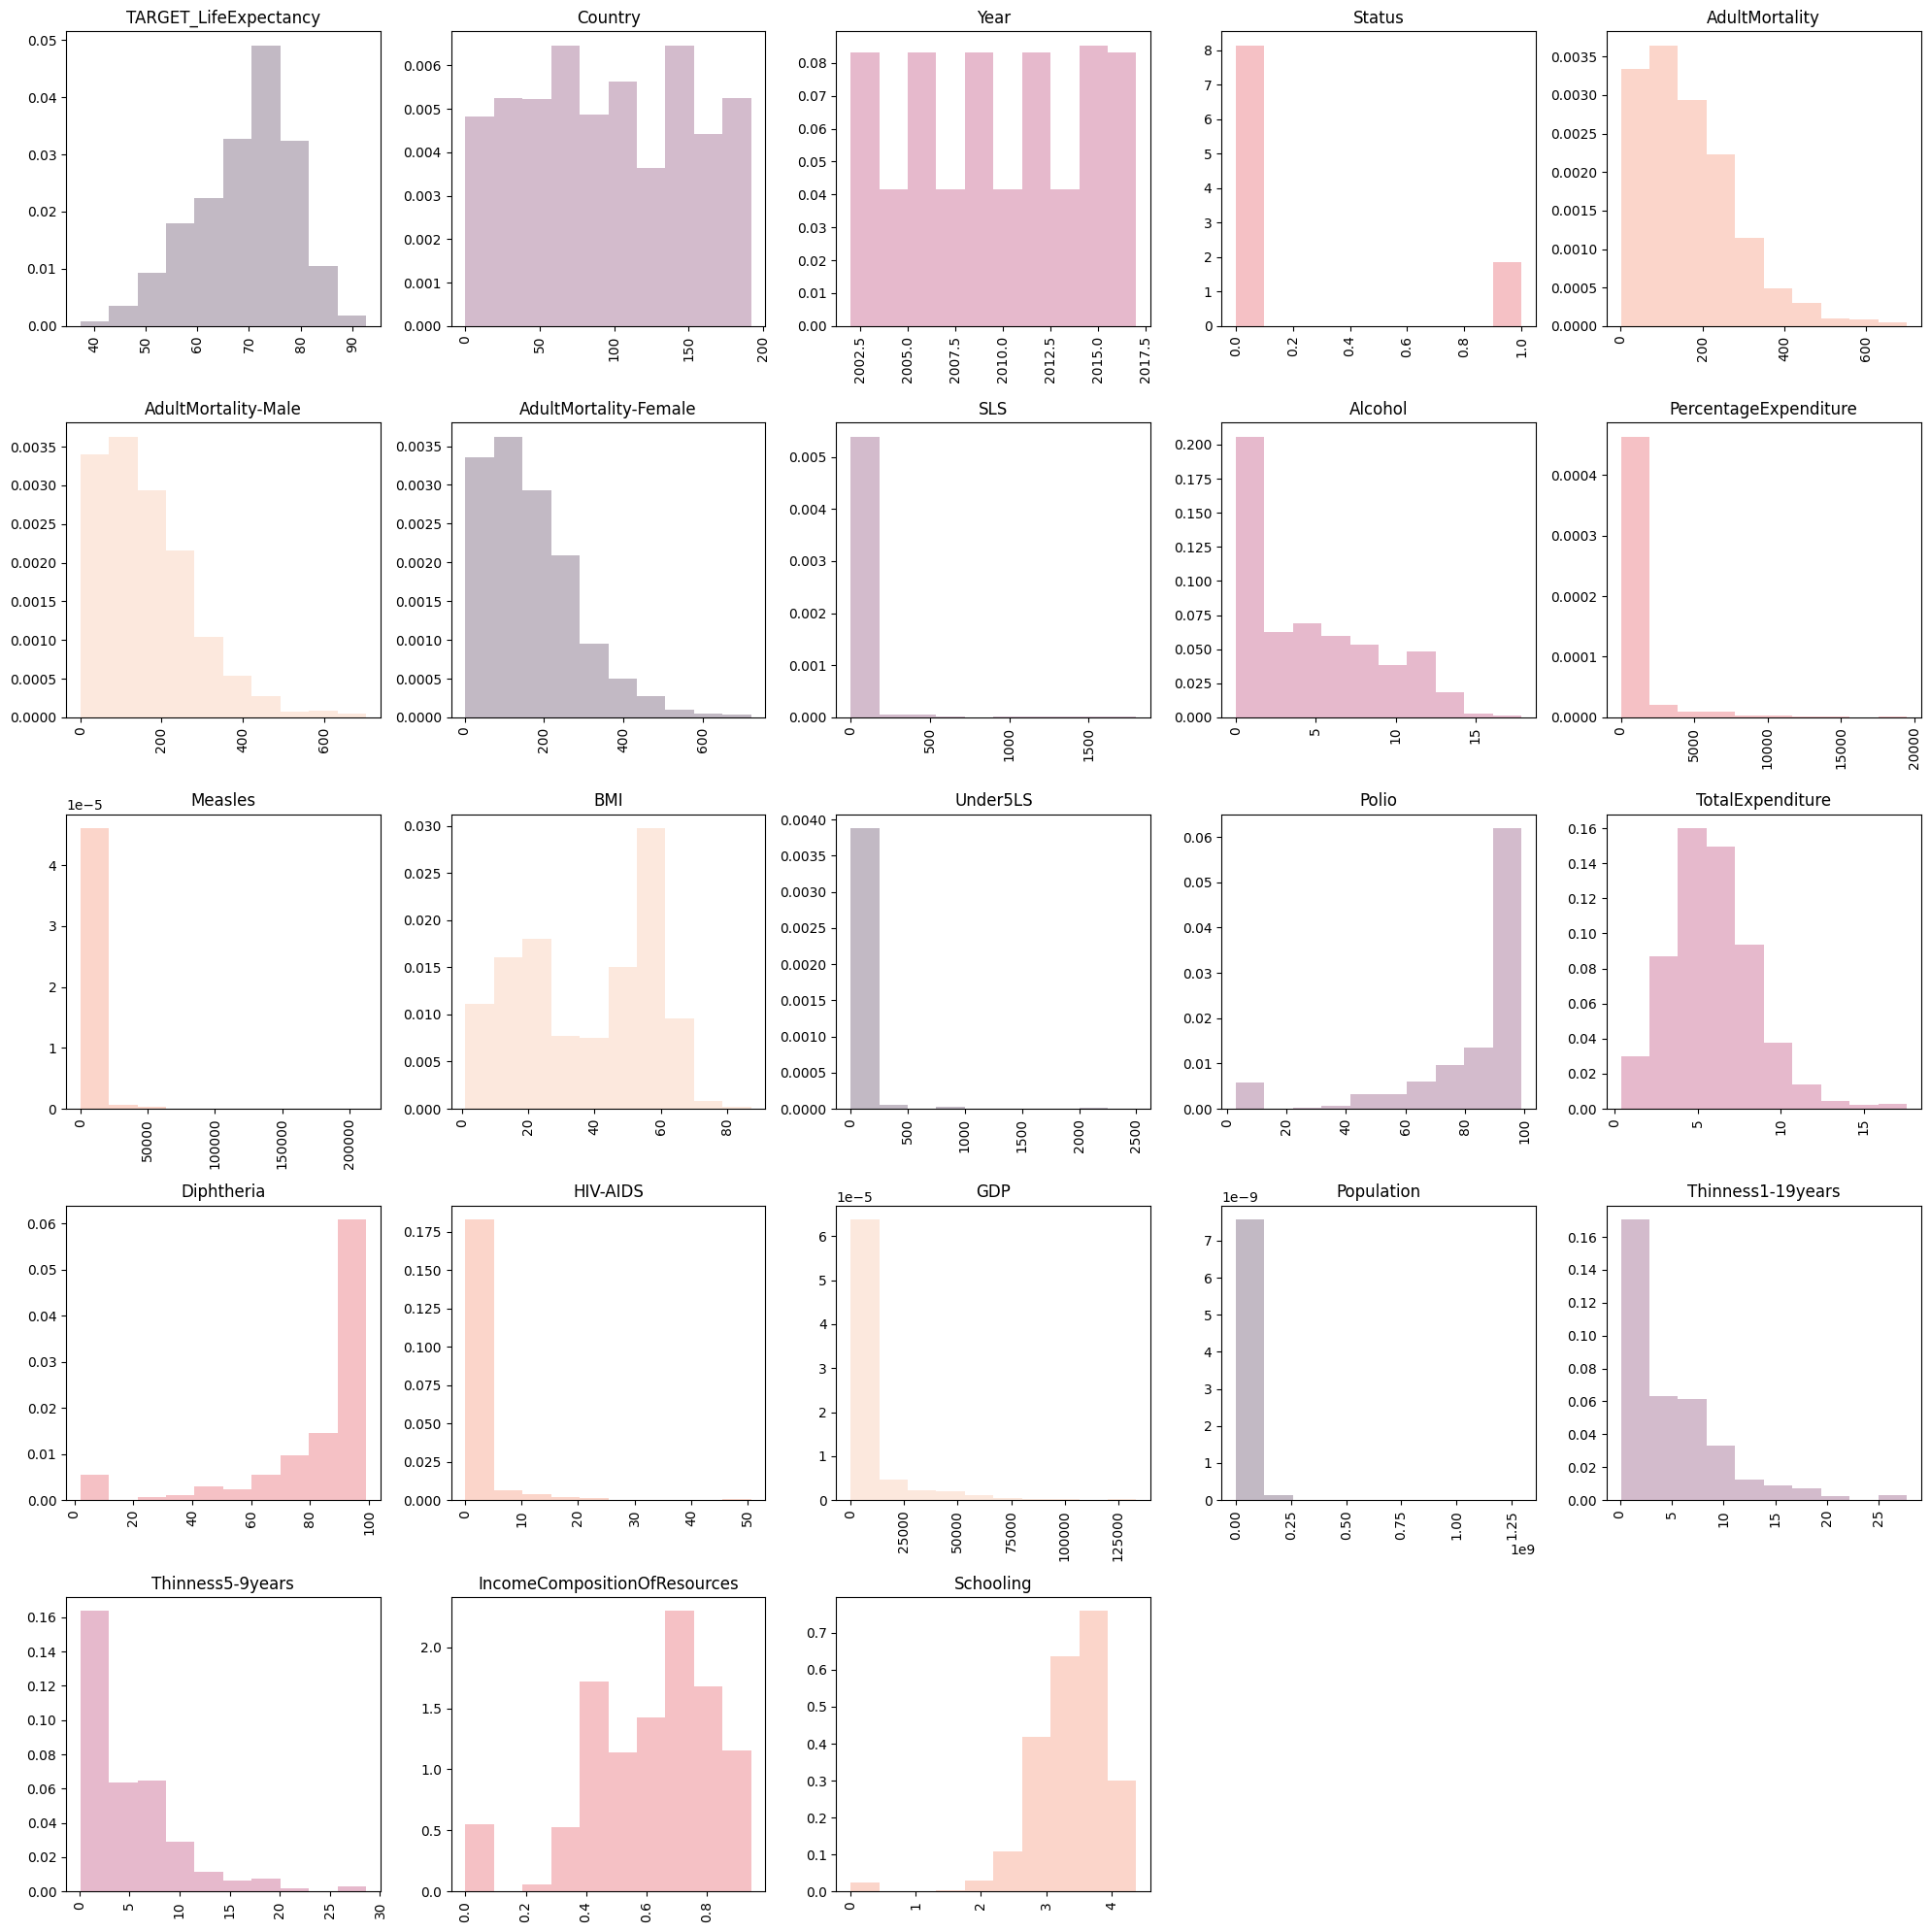

In [1705]:
# Exclude ID column
plot_columns = train_df.columns.drop(['ID'])

# Get the "rocket" color palette
rocket_palette = sns.color_palette("rocket")

plt.figure(figsize=(20, 4 * 5))  # Adjust the figure size based on the number of rows
for i, col in enumerate(plot_columns):
    plt.subplot(5, 5, i + 1)
    # Check if column data type is numeric before plotting
    if pd.api.types.is_numeric_dtype(train_df[col]):
        plt.hist(train_df[col], alpha=0.3, color = rocket_palette[i % len(rocket_palette)], density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


Observation
*   The "Status" attribute is categorical, with the majority of data instances belonging to category 0 and only a minority to category 1.
*   Many attributes are heavily skewed. e.g. AdultMortality, AdultMortality-Male, AdultMortality - Female, SLS, Alcohol, Polio, Diptheria, Thinness1-19years,Thinness5-9years



2. Box plot

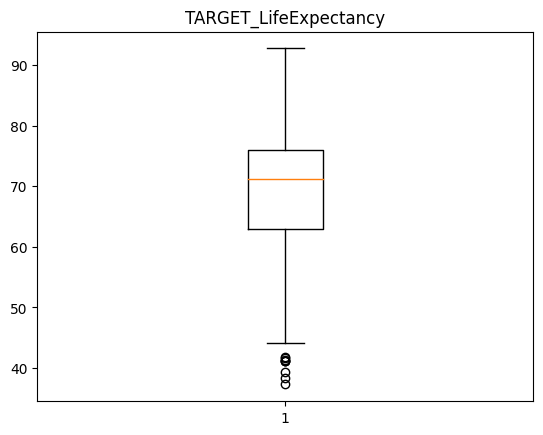

In [1706]:
# check outliers in Life_Expectancy??????? no right?

# check outlier from numerical features by using box plot
plt.boxplot(train_df['TARGET_LifeExpectancy'])
plt.title('TARGET_LifeExpectancy')
plt.show()

Observation
*   TARGET_LifeExpectancy' shows a few outliers, which are the points below the bottom line of the box

In [1707]:
#75 percentile
seventy_fifth = train_df["TARGET_LifeExpectancy"].quantile(0.75)
#25 percentile
twenty_fifth = train_df["TARGET_LifeExpectancy"].quantile(0.25)
#Interquartile range
life_exp_iqr = seventy_fifth - twenty_fifth
print(life_exp_iqr)

13.0


In [1708]:
# upper threshold
upper = seventy_fifth + (1.5 * life_exp_iqr)
# lower threshold
lower = twenty_fifth - (1.5 * life_exp_iqr)
print(upper,lower)

95.5 43.5


In [1709]:
outlier_rows = train_df[
    (train_df["TARGET_LifeExpectancy"] < lower) |
    (train_df["TARGET_LifeExpectancy"] > upper)
][["ID", "TARGET_LifeExpectancy","Status","GDP"]]

print(outlier_rows)

        ID  TARGET_LifeExpectancy  Status     GDP
360    361                   41.2       0  444.81
790    791                   38.3       0  741.75
1647  1648                   41.9       0  360.99
1648  1649                   41.1       0  322.21
1649  1650                   41.3       0  294.72
1650  1651                   39.3       0  295.41
1652  1653                   41.6       0  255.11
1653  1654                   37.3       0  156.03
2070  2071                   41.1       0  382.99


Since these outliers are from developing countries(status = 0), their lower life expectancy values could reflect real-world situations due to factors like lower access to healthcare, higher disease prevalence, or socio-economic conditions. Hence, we will not remove the outliers because it might oversimplify or misrepresent the reality of life expectancy in these regions.

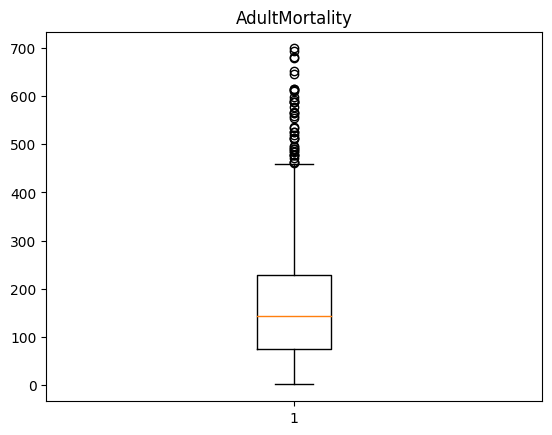

In [1710]:
plt.boxplot(train_df['AdultMortality'])
plt.title('AdultMortality')
plt.show()

Observation
*   
The box plot for 'AdultMortality' reveals several outliers above the upper range.

In [1711]:
#75 percentile
seventy_fifth = train_df["AdultMortality"].quantile(0.75)
#25 percentile
twenty_fifth = train_df["AdultMortality"].quantile(0.25)
#Interquartile range
adult_iqr = seventy_fifth - twenty_fifth
print(adult_iqr)

154.0


In [1712]:
# upper threshold
upper = seventy_fifth + (1.5 * adult_iqr)
# lower threshold
lower = twenty_fifth - (1.5 * adult_iqr)
print(upper,lower)

459.0 -157.0


In [1713]:
outlier_rows = train_df[
    (train_df["AdultMortality"] < lower) |
    (train_df["AdultMortality"] > upper)
][["ID", "AdultMortality","Status"]]

print(outlier_rows)

        ID  AdultMortality  Status
249    250             491       0
250    251             566       0
251    252             652       0
252    253             693       0
253    254             699       0
254    255             679       0
255    256             647       0
359    360             477       0
360    361             495       0
362    363             511       0
363    364             512       0
608    609             593       0
790    791             682       0
1158  1159             462       0
1159  1160             491       0
1160  1161             525       0
1161  1162             559       0
1162  1163             587       0
1164  1165             615       0
1165  1166             613       0
1167  1168             599       0
1168  1169             588       0
1324  1325             477       0
1325  1326             483       0
1326  1327             471       0
1639  1640             463       0
1647  1648             464       0
1649  1650          

The high AdultMortality rates likely reflect real and significant public health issues. Hence, we will not remove the outliers because it could lead to an incomplete or skewed understanding of global health patterns, particularly in the most affected areas

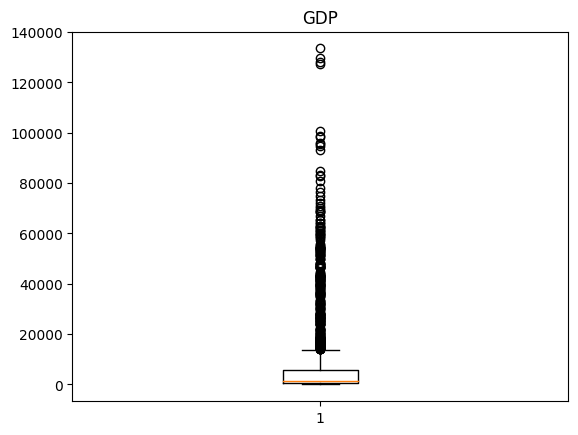

In [1714]:
plt.boxplot(train_df['GDP'])
plt.title('GDP')
plt.show()


Observation
*  This box plot for 'GDP' indicates a concentration of data near the bottom with many high-value outliers.

In [1715]:
#75 percentile
seventy_fifth = train_df["GDP"].quantile(0.75)
#25 percentile
twenty_fifth = train_df["GDP"].quantile(0.25)
#Interquartile range
gdp_iqr = seventy_fifth - twenty_fifth
print(gdp_iqr)

5397.5650000000005


In [1716]:
# upper threshold
upper = seventy_fifth + (1.5 * gdp_iqr)
# lower threshold
lower = twenty_fifth - (1.5 * gdp_iqr)
print(upper,lower)

13907.642500000002 -7682.6175


In [1717]:
outlier_rows = train_df[
    (train_df["GDP"] < lower) |
    (train_df["GDP"] > upper)
][["ID", "GDP"]]

print(outlier_rows)

        ID       GDP
48      49  15194.99
49      50  14434.89
51      52  14073.30
56      57  15962.57
57      58  14251.32
...    ...       ...
1919  1920  47793.33
1920  1921  47456.89
1921  1922  44172.60
1922  1923  40500.52
1924  1925  35068.72

[295 rows x 2 columns]


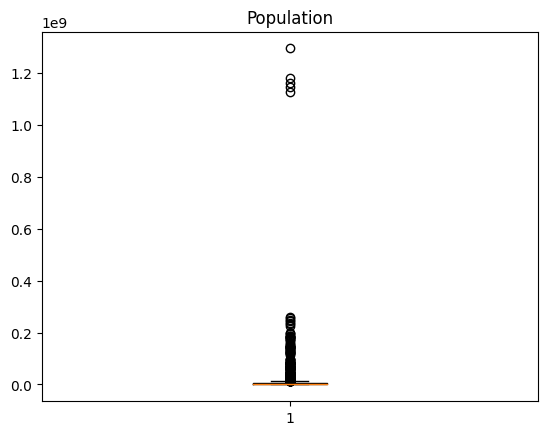

In [1718]:
plt.boxplot(train_df['Population'])
plt.title('Population')
plt.show()

Observation
*   The 'Population' box plot reveals a few extremely high outliers above the main cluster of data.

In [1719]:
#75 percentile
seventy_fifth = train_df["Population"].quantile(0.75)
#25 percentile
twenty_fifth = train_df["Population"].quantile(0.25)
#Interquartile range
population_iqr = seventy_fifth - twenty_fifth
print(population_iqr)

5243659.0


In [1720]:
# upper threshold
upper = seventy_fifth + (1.5 * population_iqr)
# lower threshold
lower = twenty_fifth - (1.5 * population_iqr)
print(upper,lower)

13236592.5 -7738043.5


In [1721]:
outlier_rows = train_df[
    (train_df["Population"] < lower) |
    (train_df["Population"] > upper)
][["ID", "Population"]]

print(outlier_rows)

        ID  Population
0        1    33736494
2        3    31731688
8        9    26616792
11      12    24118979
13      14    21979923
...    ...         ...
1909  1910    48683865
1910  1911    49175848
2058  2059    14699937
2059  2060    14264756
2061  2062    13456417

[287 rows x 2 columns]


# Relationship between variables

## Scatter plot


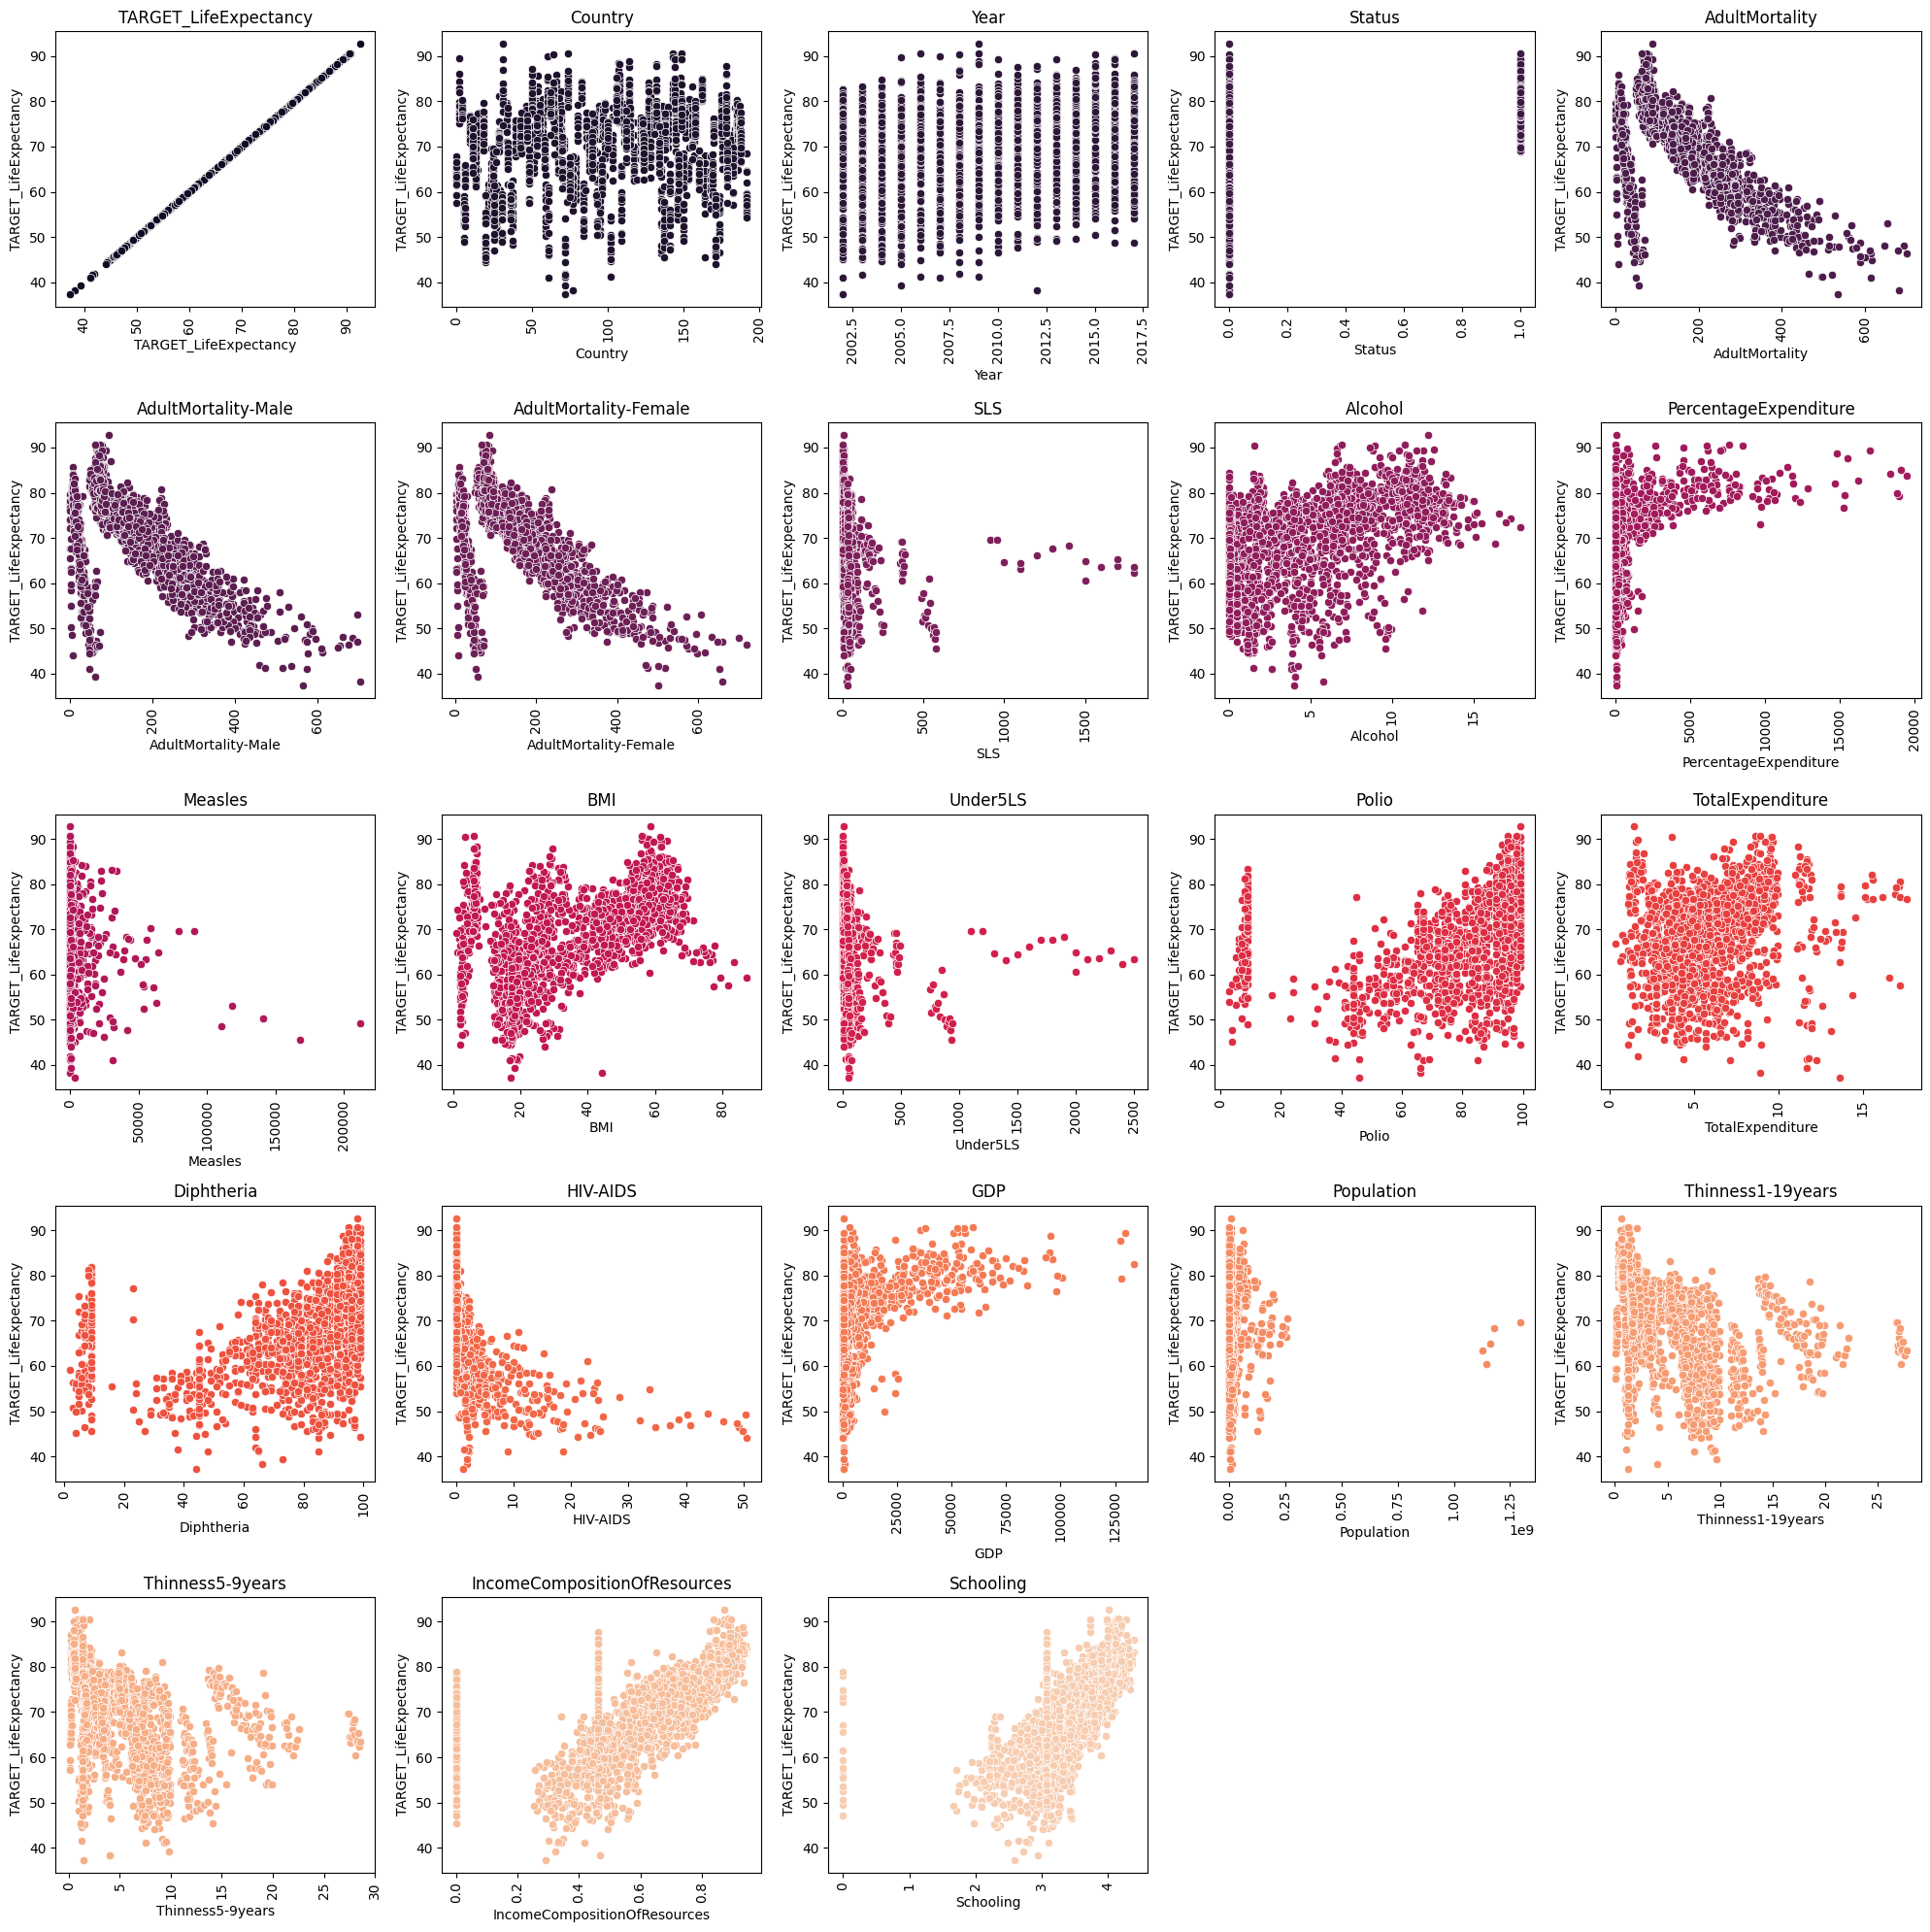

In [1722]:
# Exclude ID column and any other non-useful for histogram columns if necessary
plot_columns = train_df.columns.drop(['ID'])

# Define the rocket palette
rocket_palette = sns.color_palette('rocket', len(train_df.columns))

plt.figure(figsize=(20, 20))
for i, col in enumerate(plot_columns):
    plt.subplot(5, 5, i + 1)
    # Add color to the scatterplot from the rocket palette
    sns.scatterplot(data=train_df, x=col, y='TARGET_LifeExpectancy', color=rocket_palette[i % len(rocket_palette)])
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.tight_layout()  # Adjust subplots to fit the layout
plt.show()

# Observation
Variables with a Linear Relationship with TARGET_LifeExpectancy: Schooling,
IncomeCompositionOfResources
* As life expectancy increases, schooling increases.
* Higher human development, greater life expectancy

Variables with a Non-Linear Relationship with TARGET_LifeExpectancy: BMI, AdultMortality, AdultMortality-Male, AdultMortality-Female, HIV-AIDS, Thinness1-19years, Thinness5-9years

* AdultMortality, AdultMortality-Male, and AdultMortality-Female show a strong, non-linear decrease in 'TARGET_LifeExpectancy' as mortality rates go up, likely following an exponential pattern, where increases in adult mortality are associated with sharp decreases in life expectancy.
* Higher HIV/AIDS,lower life expectancy, but this does not seem to follow a straight line



<ipython-input-1723-784025b9723e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


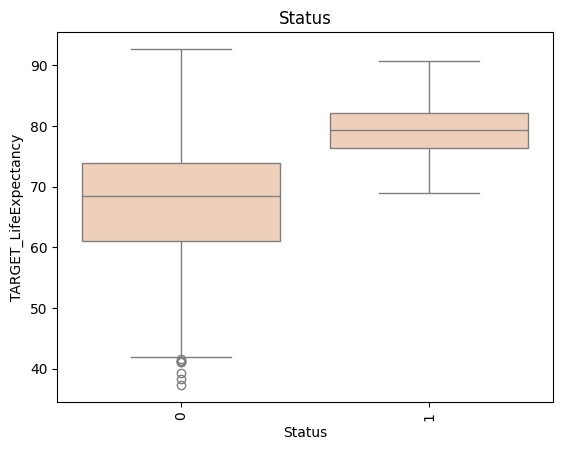

In [1723]:
# use Box Plot to find the relationship between categorical attributes and continuous variables

# Define the rocket palette
rocket_palette = sns.color_palette('rocket', len(train_df.columns))

ax = sns.boxplot(y='TARGET_LifeExpectancy',x='Status',data= train_df, color=rocket_palette[i % len(rocket_palette)])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Status')

plt.xticks(rotation='vertical')
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:**
> - On average, data with 'Status=1' have a higher 'LifeExpectancy' compared to those with 'Status=0'.

Plot correlation matrix for the numerical data and check for multicollinearity

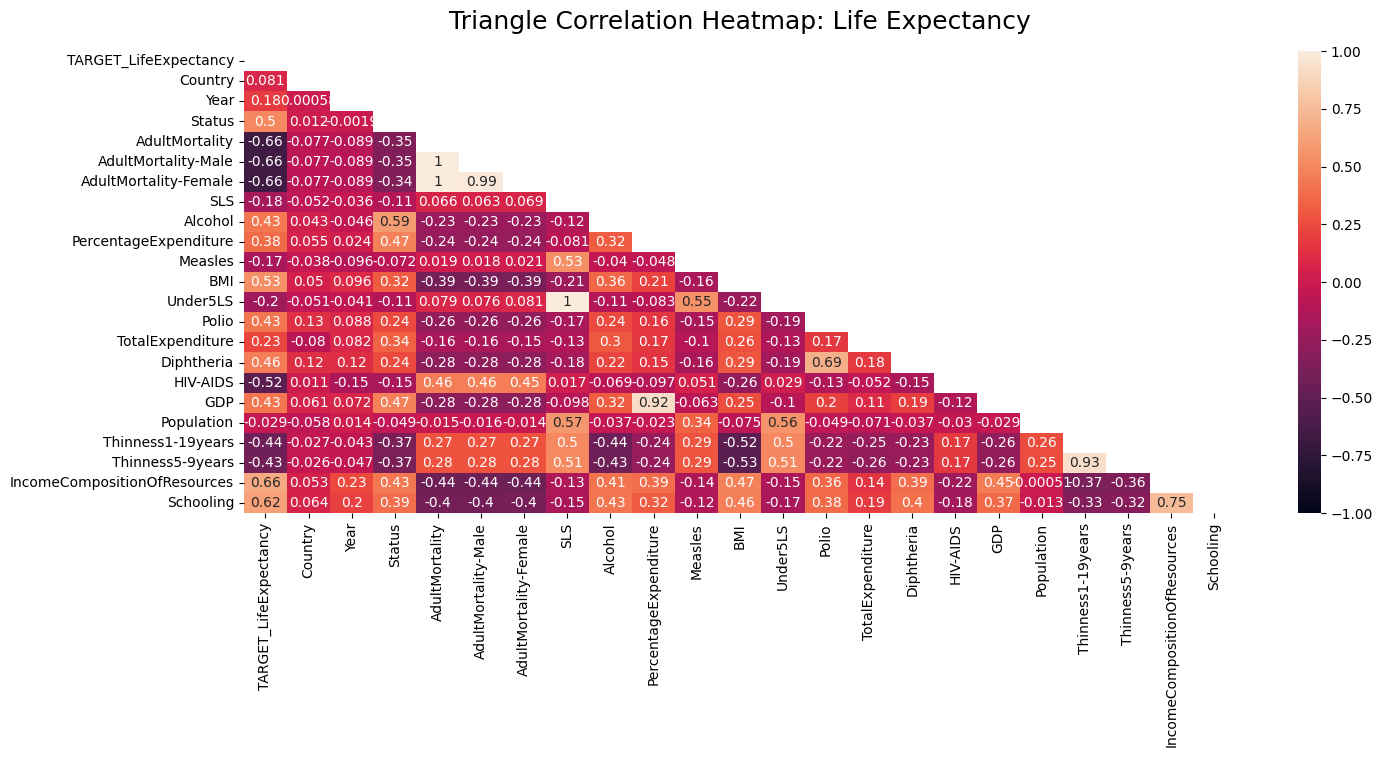

In [1724]:
# Exclude ID column and any other non-useful for histogram columns if necessary
plot_columns = train_df.drop(['ID'], axis=1)

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(plot_columns.corr(), dtype=bool))
heatmap = sns.heatmap(plot_columns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Triangle Correlation Heatmap: Life Expectancy', fontdict={'fontsize':18}, pad=16)
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:**
> - Higher schooling and income levels are strongly linked to greater life expectancy
> - Higher adult mortality rates and HIV prevalence are strongly linked to lower life expectancy
> - Better BMI and healthcare (immunization rates for diphtheria) are moderately linked to higher life expectancy.
> - Thinness in children and adolescents is moderately linked to lower life expectancy
> - Other factors like country, alcohol consumption, and health expenditure show weak links to life expectancy
> - Two variables in the dataset have a correlation coefficient of 1, it means they are perfectly linearly related; in other words, they provide identical information. This can occur due to a data entry error, a duplicate column, or if one variable is a direct calculation from the other e.g. 'AdultMortality and AdultMortality-Male', 'AdultMortality and AdultMortality-Female'
> - A correlation of 1 between SLS and Under5LS means they are perfectly correlated, essentially duplicates. So, we will remove one to avoid redundancy and multicollinearity

Note:
When constructing a model like linear regression, if two features show perfect correlation, this can skew the results. This happens because you can't tell the separate impact of each feature on the outcome, as any change in one is exactly mirrored by the other.

**** End of EDA ****
---------------------

---





# Data Splitting


To assess the model, we divide the labeled train_df into two parts:
* training
* validation


Splitting the data into training and validation sets allows me to train my model on one portion of the data and test its performance on another, unseen portion. This helps ensure that the model can generalize well to new data, beyond just memorizing the training set.

In [1725]:
#Separate the target and the attributes
life_train_df_X = train_df.drop(['TARGET_LifeExpectancy'], axis=1)
life_train_df_y = train_df['TARGET_LifeExpectancy']
print(life_train_df_X)


        ID  Country  Year  Status  AdultMortality  AdultMortality-Male  \
0        1      146  2017       0             263                  262   
1        2      146  2016       0             271                  278   
2        3      146  2015       0             268                  246   
3        4      146  2014       0             272                  248   
4        5      146  2013       0             275                  278   
...    ...      ...   ...     ...             ...                  ...   
2066  2067       61  2006       0             578                  596   
2067  2068       61  2005       0              64                   66   
2068  2069       61  2004       0              69                   70   
2069  2070       61  2003       0             611                  574   
2070  2071       61  2002       0             614                  574   

      AdultMortality-Female  SLS  Alcohol  PercentageExpenditure  ...  Polio  \
0                       264   6

In [1726]:
print(life_train_df_y)

0       67.1
1       59.8
2       57.6
3       55.5
4       57.7
        ... 
2066    47.7
2067    46.0
2068    46.2
2069    47.1
2070    41.1
Name: TARGET_LifeExpectancy, Length: 2071, dtype: float64


Randomly split our data to 80% training set and 20% validation set.

In [1727]:
from sklearn.model_selection import train_test_split
with pd.option_context('mode.chained_assignment', None):
        life_X_training, life_X_validation, life_y_training, life_y_validation= train_test_split(life_train_df_X, life_train_df_y, test_size=0.2, random_state=42)

In [1728]:
print("Nunber of instances in the original dataset is {}. After spliting training has {} instances and validation has {} instances."
      .format(train_df.shape[0],life_X_training.shape[0], life_X_validation.shape[0]))


Nunber of instances in the original dataset is 2071. After spliting training has 1656 instances and validation has 415 instances.


Checking the splits

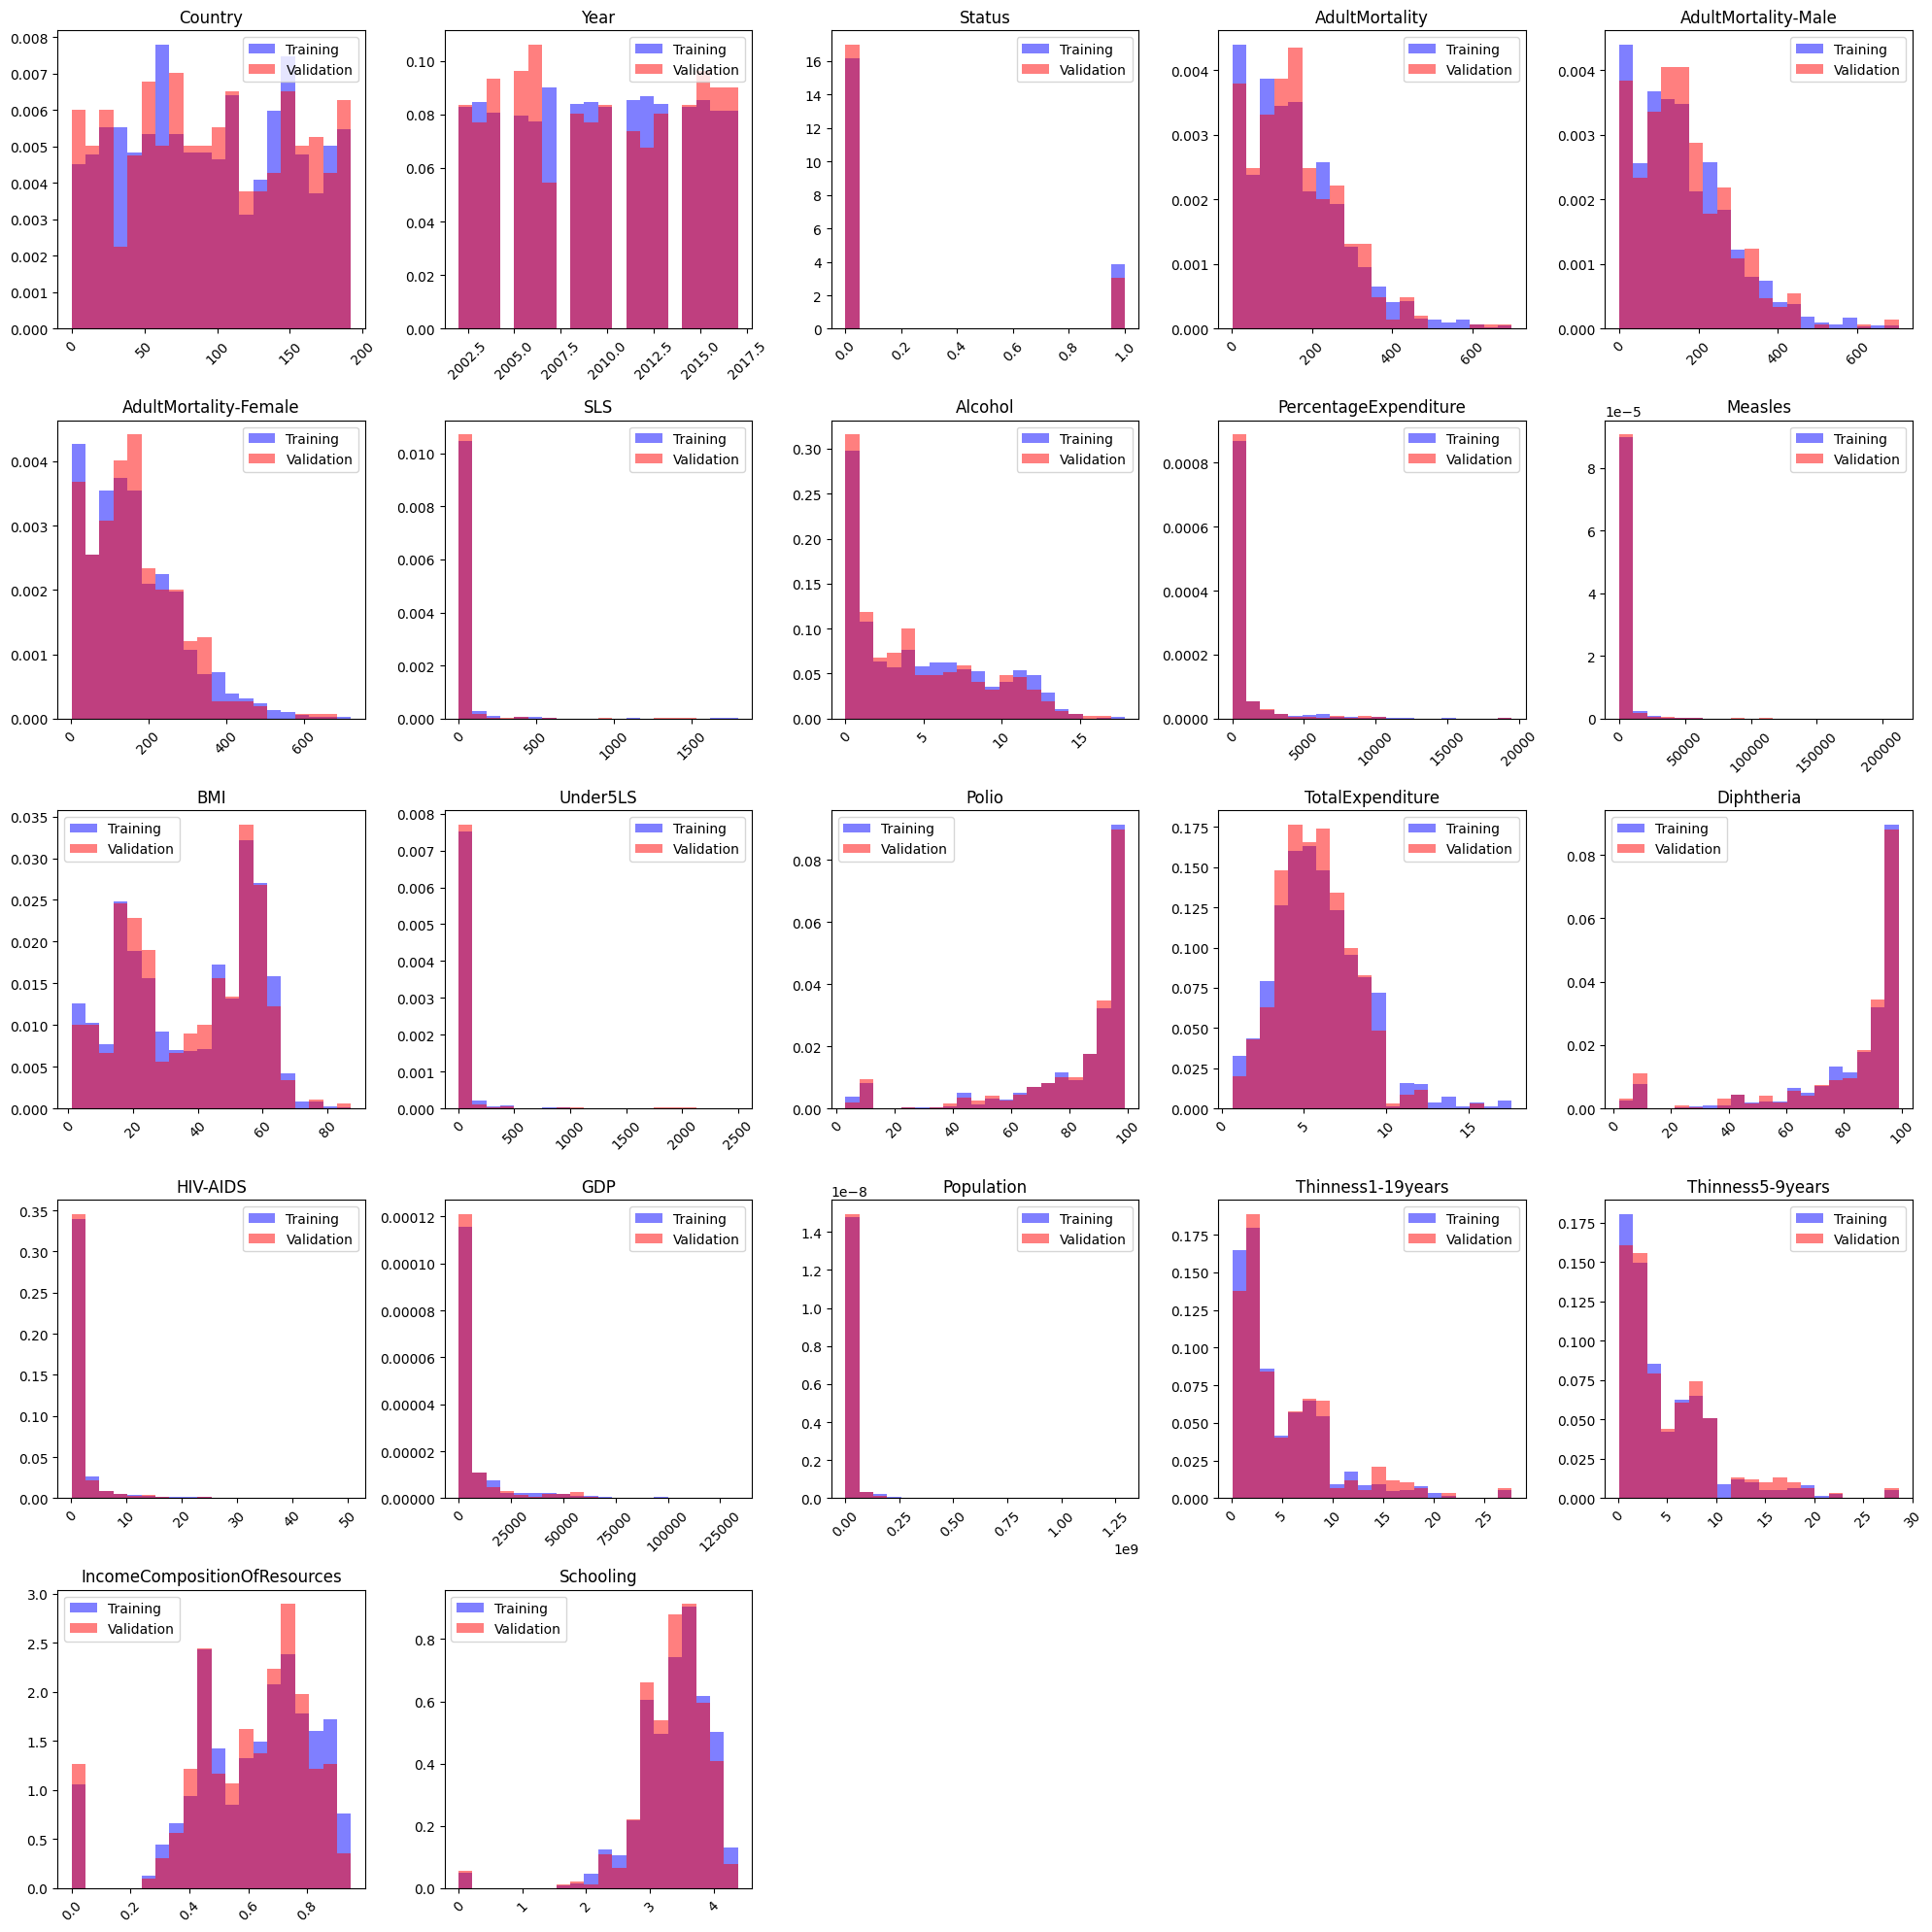

In [1729]:
import matplotlib.pyplot as plt

plot_columns = life_X_training.drop(['ID'], axis=1)

plt.figure(figsize=(20,20))

# Define the number of bins for histogram
n_bins = 20

for i, col in enumerate(plot_columns):
    plt.subplot(5,5,i+1)
    # Plot histograms for both training and validation sets
    _, bins, _ = plt.hist(life_X_training[col], bins=n_bins, alpha=0.5, color ='b', density=True, label='Training')
    plt.hist(life_X_validation[col], bins=bins, alpha=0.5, color ='r', density=True, label='Validation')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.legend()

# Use tight layout to ensure there's no overlapping
plt.tight_layout()

# Show the plot
plt.show()



Observation
*   From the histograms, it appears that the distributions of the training and validation sets are similar, suggesting that the random split has been reasonably effective.

# Data Pre-processing (or Transforming)

## Feature Scaling

We split data before scaling it to avoid data leakage, which occurs when the model inadvertently learns from information it shouldn't have access to, leading to unrealistically high performance during training that doesn't hold up in actual use. Splitting the data into training and validation sets before applying any transformations is a good practice to ensure that the model is evaluated on unseen data.

We will perform scaling and power transforming on the **training data** to avoid data leakage, which means we will use data that we won't have access to when we assess the performance of the model.
Otherwise, we will overestimate the accuracy of our model

 For linear regression using gradient descent, feature scaling aids in faster convergence by ensuring that all features contribute equally to the cost function, allowing the optimization algorithm to proceed more efficiently.

I decided to use **Standard Scaler** because my data have the below items
- 1) **Outliers**:
linear regression is vulnerable to outliers. Using StandardScaler to standardize features by their z-score can mitigate this impact, potentially enhancing model performance. However, for extreme outliers, additional outlier handling may be necessary for optimal results.
- 2) **Heavily Skewed Features:** while StandardScaler does not directly transform skewed data into a normal distribution, it ensures each feature has a mean of 0 and a standard deviation of 1, which can be beneficial for linear regression.
- 3) **Plan to Linear Regression** linear regression assumes that the features are normally distributed. Standardization can help in this regard, especially when combining features that have different scales and distributions.

In [1730]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Features selected for power transformation based on right-skew and high variance
logNorm_attributes = ['Population', 'GDP','AdultMortality','SLS','Polio','Under5LS','HIV-AIDS']

# The remaining features that will not undergo power transformation but will be scaled using standard scaler
# Ensure 'logNorm_attributes' are not double-scaled by StandardScaler
standard_attributes = [col for col in life_train_df_X.columns if col not in logNorm_attributes]

# Make copies of the datasets for scaling to ensure the original data remain unchanged
life_X_training_scaled = life_X_training.copy()
life_X_validation_scaled = life_X_validation.copy()

# Initialize and fit the StandardScaler on the standard attributes
standardscaler = StandardScaler()
life_X_training_scaled[standard_attributes] = standardscaler.fit_transform(life_X_training_scaled[standard_attributes])
life_X_validation_scaled[standard_attributes] = standardscaler.transform(life_X_validation_scaled[standard_attributes])

# Initialize and fit the PowerTransformer on the log normalization attributes
# Note: PowerTransformer applies a standard scaling after the power transformation
powertransformer = PowerTransformer(method='yeo-johnson')
life_X_training_scaled[logNorm_attributes] = powertransformer.fit_transform(life_X_training_scaled[logNorm_attributes])
life_X_validation_scaled[logNorm_attributes] = powertransformer.transform(life_X_validation_scaled[logNorm_attributes])


In [1731]:
life_X_training_scaled.shape

(1656, 23)

Check distribution after scaling

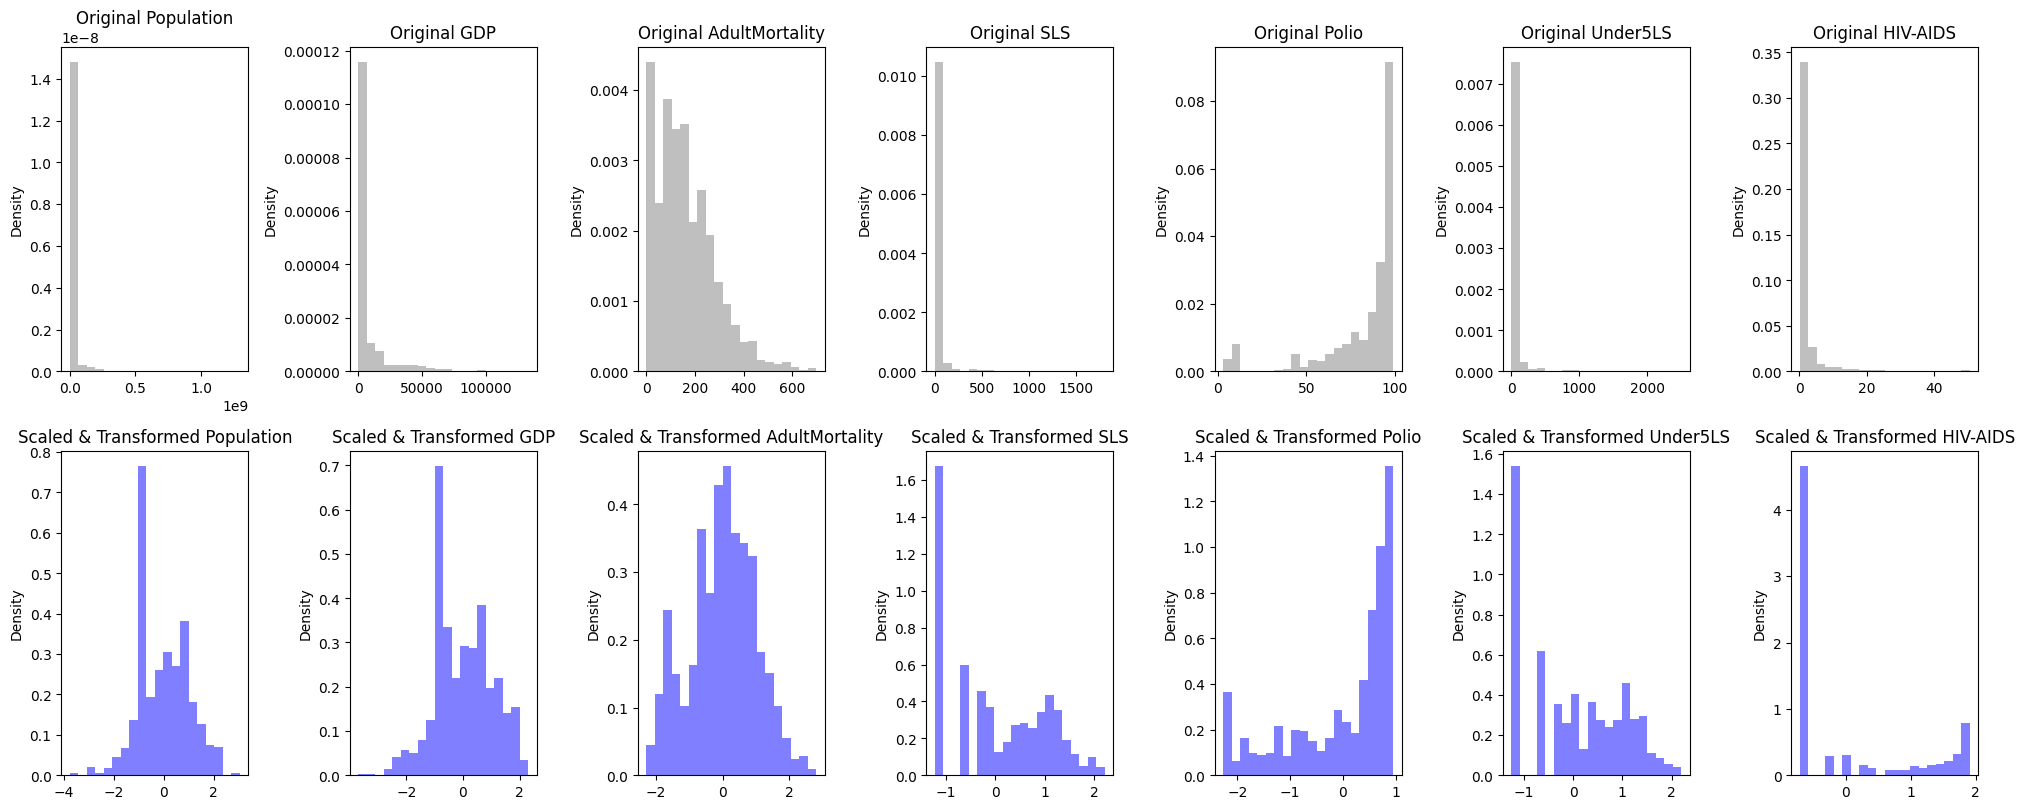

In [1732]:
import matplotlib.pyplot as plt

# Features to visualize
features = ['Population', 'GDP','AdultMortality','SLS','Polio','Under5LS','HIV-AIDS']

# Create the figure with a larger size for better visibility
plt.figure(figsize=(20, 12))

for i, feature in enumerate(features):
    # Original feature histogram
    plt.subplot(3, len(features), i+1)
    plt.hist(life_X_training[feature], bins=20, alpha=0.5, color='grey', density=True)
    plt.title(f"Original {feature}")
    plt.ylabel('Density')

    # Scaled feature histogram (after StandardScaler)
    plt.subplot(3, len(features), i+1+len(features))
    plt.hist(life_X_training_scaled[feature], bins=20, alpha=0.5, color='blue', density=True)
    plt.title(f"Scaled & Transformed {feature}")
    plt.ylabel('Density')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


> <span style="font-size:1em;">✔</span> **Observation:**

- StandardScaler doesn't change the shape of the distribution; it simply centers the data by removing the mean and scales it by dividing non-constant features by their standard deviation.

- PowerTransformer transforms the data to make it more Gaussian-like, which can improve the efficacy of linear models and other algorithms that assume normality.



In [1733]:
print(life_X_training_scaled)

            ID   Country      Year    Status  AdultMortality  \
1889  1.431126  0.945076 -0.766906 -0.490356        0.750626   
1566  0.889666  0.999929 -0.330931 -0.490356        1.268615   
1044  0.014614 -0.865071  0.976996 -0.490356       -1.332556   
175  -1.442129  1.475322 -1.638857 -0.490356        0.806913   
1609  0.961749  1.676449  0.976996 -0.490356       -1.845472   
...        ...       ...       ...       ...             ...   
1638  1.010363 -0.426248  1.630959 -0.490356        1.688309   
1095  0.100108 -1.267326  0.323033 -0.490356        0.986636   
1130  0.158780 -0.499385 -0.330931  2.039333        0.693130   
1294  0.433701  0.506253 -0.984894 -0.490356        0.089063   
860  -0.293833 -1.303895 -0.766906 -0.490356        0.594412   

      AdultMortality-Male  AdultMortality-Female       SLS   Alcohol  \
1889             0.679579               0.567372  0.285858 -0.452458   
1566             1.225231               1.513681  0.924964  0.497778   
1044           

# Encoding

- Since **Status** attribute is already encoded as 0 for developing countries and 1 for developed country, we will leave it alone.


# Data Modeling


* Training Data:
** Country, Year, Status, AdultMortality,  AdultMortality-Male,  AdultMortality-female,Under5LS, SLS, Alcohol, Measles, BMI, Polio, TotalExpenditure, Diphtheria
, HIV-AIDS, GDP, Population, Thinness1-19years, Thinness5-9years, IncomeCompositionOfResources, Schooling
* Target Variable: TARGET_LifeExpectancy

### Baseline Model: Linear Regression Model

> <span style="font-size:1em;"></span>
> Reasons to select a linear regression model as a baseline model.

- Our exploratory data analysis revealed linear correlations between TARGET_LifeExpectancy and several variables, notably Schooling and IncomeCompositionOfResources.
- The linear model offers simplicity and intuitive understanding.
- Algorithms that use gradient descent as an optimization technique (e.g., linear regression, logistic regression, neural networks) benefit from feature scaling. It ensures a faster convergence because the gradient descent path becomes smoother.

In [1734]:
life_X_training_scaled

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1889,1.431126,0.945076,-0.766906,-0.490356,0.750626,0.679579,0.567372,0.285858,-0.452458,-0.285098,...,0.863482,-0.617634,0.614772,-0.703201,0.009478,-0.220281,-0.314675,-0.317228,-2.826951,-0.282092
1566,0.889666,0.999929,-0.330931,-0.490356,1.268615,1.225231,1.513681,0.924964,0.497778,-0.335112,...,0.954799,-1.795243,0.703248,1.841454,-0.790712,-0.857156,0.418572,0.403592,-0.961972,-0.551056
1044,0.014614,-0.865071,0.976996,-0.490356,-1.332556,-1.122726,-1.109421,0.496196,-1.126133,-0.371575,...,-0.626493,-1.445759,-0.181505,0.015415,-0.748071,-0.733653,0.914593,0.912407,-0.269529,-0.308383
175,-1.442129,1.475322,-1.638857,-0.490356,0.806913,0.762253,0.633780,-0.606386,1.939678,-0.360307,...,0.954799,0.077536,0.703248,-0.703201,-0.061643,0.075067,-0.465638,-0.444432,0.289042,0.408169
1609,0.961749,1.676449,0.976996,-0.490356,-1.845472,-1.271540,-1.275440,0.435853,-1.107222,-0.280321,...,0.863482,-0.784778,0.659010,-0.703201,0.310459,-0.733653,0.569535,0.530796,0.949171,0.725487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.010363,-0.426248,1.630959,-0.490356,1.688309,2.068511,2.078146,0.924964,-0.216081,-0.371575,...,-0.104301,2.189635,0.128158,0.471719,-0.489106,-0.052499,0.547969,0.509595,-0.837332,-0.496148
1095,0.100108,-1.267326,0.323033,-0.490356,0.986636,1.043347,0.849605,0.549534,-0.242082,-0.368977,...,-0.243657,3.215295,-0.093030,1.555441,-2.116068,0.612393,0.591101,0.530796,-0.980437,-0.441815
1130,0.158780,-0.499385,-0.330931,2.039333,0.693130,0.481160,0.617178,-1.222733,1.873492,-0.317438,...,0.515022,0.104127,0.482059,-0.703201,-0.238396,-0.365834,-0.400939,-0.402030,0.898392,1.132550
1294,0.433701,0.506253,-0.984894,-0.490356,0.089063,-0.180236,-0.096704,0.963526,-0.991398,-0.330607,...,0.270909,-0.256753,0.349346,-0.703201,0.101535,1.454406,0.375440,0.318790,-0.283378,-0.551056


In [1735]:
# prompt: life_X_training_scaled drop id column

life_X_training_scaled = life_X_training_scaled.drop('ID', axis=1)
print(life_X_training_scaled)


       Country      Year    Status  AdultMortality  AdultMortality-Male  \
1889  0.945076 -0.766906 -0.490356        0.750626             0.679579   
1566  0.999929 -0.330931 -0.490356        1.268615             1.225231   
1044 -0.865071  0.976996 -0.490356       -1.332556            -1.122726   
175   1.475322 -1.638857 -0.490356        0.806913             0.762253   
1609  1.676449  0.976996 -0.490356       -1.845472            -1.271540   
...        ...       ...       ...             ...                  ...   
1638 -0.426248  1.630959 -0.490356        1.688309             2.068511   
1095 -1.267326  0.323033 -0.490356        0.986636             1.043347   
1130 -0.499385 -0.330931  2.039333        0.693130             0.481160   
1294  0.506253 -0.984894 -0.490356        0.089063            -0.180236   
860  -1.303895 -0.766906 -0.490356        0.594412             0.464625   

      AdultMortality-Female       SLS   Alcohol  PercentageExpenditure  \
1889               0.5673

In [1736]:
life_X_training_scaled.shape

(1656, 22)

In [1737]:
life_X_training_scaled.head()

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1889,0.945076,-0.766906,-0.490356,0.750626,0.679579,0.567372,0.285858,-0.452458,-0.285098,-0.211506,...,0.863482,-0.617634,0.614772,-0.703201,0.009478,-0.220281,-0.314675,-0.317228,-2.826951,-0.282092
1566,0.999929,-0.330931,-0.490356,1.268615,1.225231,1.513681,0.924964,0.497778,-0.335112,-0.163295,...,0.954799,-1.795243,0.703248,1.841454,-0.790712,-0.857156,0.418572,0.403592,-0.961972,-0.551056
1044,-0.865071,0.976996,-0.490356,-1.332556,-1.122726,-1.109421,0.496196,-1.126133,-0.371575,-0.208475,...,-0.626493,-1.445759,-0.181505,0.015415,-0.748071,-0.733653,0.914593,0.912407,-0.269529,-0.308383
175,1.475322,-1.638857,-0.490356,0.806913,0.762253,0.633780,-0.606386,1.939678,-0.360307,-0.209550,...,0.954799,0.077536,0.703248,-0.703201,-0.061643,0.075067,-0.465638,-0.444432,0.289042,0.408169
1609,1.676449,0.976996,-0.490356,-1.845472,-1.271540,-1.275440,0.435853,-1.107222,-0.280321,-0.182853,...,0.863482,-0.784778,0.659010,-0.703201,0.310459,-0.733653,0.569535,0.530796,0.949171,0.725487


In [1738]:
life_y_training.shape

(1656,)

In [1739]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(life_X_training_scaled, life_y_training)

In [1740]:
print("Parameter of the Linear model: ", model_lr.coef_)
print("Intercept of the Linear model: ", model_lr.intercept_)

Parameter of the Linear model:  [-0.0374156   0.47280912  0.88631337  4.60347288 -3.83025297 -3.09156447
  1.27214645  0.51747535  0.36379938 -0.20579273 -0.08721255 -2.12431509
  0.65247932 -0.0918276   0.33590555 -2.76986849  0.40627409  0.17782075
 -0.08789262 -0.49060724  1.34855431  0.5243386 ]
Intercept of the Linear model:  69.37059178743962


In [1741]:
life_X_training_scaled.head()


,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1889,0.945076,-0.766906,-0.490356,0.750626,0.679579,0.567372,0.285858,-0.452458,-0.285098,-0.211506,...,0.863482,-0.617634,0.614772,-0.703201,0.009478,-0.220281,-0.314675,-0.317228,-2.826951,-0.282092
1566,0.999929,-0.330931,-0.490356,1.268615,1.225231,1.513681,0.924964,0.497778,-0.335112,-0.163295,...,0.954799,-1.795243,0.703248,1.841454,-0.790712,-0.857156,0.418572,0.403592,-0.961972,-0.551056
1044,-0.865071,0.976996,-0.490356,-1.332556,-1.122726,-1.109421,0.496196,-1.126133,-0.371575,-0.208475,...,-0.626493,-1.445759,-0.181505,0.015415,-0.748071,-0.733653,0.914593,0.912407,-0.269529,-0.308383
175,1.475322,-1.638857,-0.490356,0.806913,0.762253,0.633780,-0.606386,1.939678,-0.360307,-0.209550,...,0.954799,0.077536,0.703248,-0.703201,-0.061643,0.075067,-0.465638,-0.444432,0.289042,0.408169
1609,1.676449,0.976996,-0.490356,-1.845472,-1.271540,-1.275440,0.435853,-1.107222,-0.280321,-0.182853,...,0.863482,-0.784778,0.659010,-0.703201,0.310459,-0.733653,0.569535,0.530796,0.949171,0.725487


In [1742]:
feature_names = life_X_training_scaled.columns  # Ensure this references the columns of the DataFrame
coefficients = model_lr.coef_

# Check the match between the number of feature names and the number of coefficients
if len(feature_names) == len(coefficients):
    for i, feature_name in enumerate(feature_names):
        print(f"Coefficient for {feature_name}: {coefficients[i]}")
else:
    print(f"The number of features ({len(feature_names)}) does not match the number of coefficients ({len(coefficients)}).")


Coefficient for Country: -0.03741560081755884
Coefficient for Year: 0.4728091217491377
Coefficient for Status: 0.88631337020159
Coefficient for AdultMortality: 4.603472883888307
Coefficient for AdultMortality-Male: -3.8302529742684057
Coefficient for AdultMortality-Female: -3.09156447455611
Coefficient for SLS: 1.2721464541297176
Coefficient for Alcohol: 0.5174753534654335
Coefficient for PercentageExpenditure: 0.36379938107826026
Coefficient for Measles: -0.2057927265016268
Coefficient for BMI: -0.08721254644530761
Coefficient for Under5LS: -2.124315086083104
Coefficient for Polio: 0.6524793172514717
Coefficient for TotalExpenditure: -0.09182759864910893
Coefficient for Diphtheria: 0.3359055460281285
Coefficient for HIV-AIDS: -2.769868486317404
Coefficient for GDP: 0.4062740870394119
Coefficient for Population: 0.17782074854413943
Coefficient for Thinness1-19years: -0.08789261790205455
Coefficient for Thinness5-9years: -0.49060723593277955
Coefficient for IncomeCompositionOfResources:

\begin{align*}
\text{Life Expectancy} = & \ \theta_0 + \theta_1 \times \text{Country} + \theta_2 \times \text{Year} + \theta_3 \times \text{Status} + \theta_4 \times \text{Adult Mortality} + \\
& \ \theta_5 \times \text{SLS} + \theta_6 \times \text{Alcohol} + \theta_7 \times \text{Percentage Expenditure} + \theta_8 \times \text{Measles} + \\
& \ \theta_9 \times \text{BMI} + \theta_{10} \times \text{Polio} + \theta_{11} \times \text{Total Expenditure} + \theta_{12} \times \text{Diphtheria} + \\
& \ \theta_{13} \times \text{HIV/AIDS} + \theta_{14} \times \text{GDP} + \theta_{15} \times \text{Population} + \theta_{16} \times \text{Thinness 1-19 years} + \\
& \ \theta_{17} \times \text{Thinness 5-9 years} + \theta_{18} \times \text{Income Composition of Resources} + \theta_{19} \times \text{Schooling}
\end{align*}


\begin{align*}
\text{Life Expectancy} = & \ 69.3706 + 0.2248 \times \text{Country} + 0.2585 \times \text{Year} + 0.9523 \times \text{Status} \\
& - 0.8046 \times \text{AdultMortality} - 0.7400 \times \text{AdultMortality-Male} - 0.8661 \times \text{AdultMortality-Female} \\
& + 12.6577 \times \text{SLS} + 0.7237 \times \text{Alcohol} + 0.2699 \times \text{PercentageExpenditure} \\
& - 0.0215 \times \text{Measles} + 0.4497 \times \text{BMI} - 12.7766 \times \text{Under5LS} \\
& + 0.3884 \times \text{Polio} - 0.0744 \times \text{TotalExpenditure} + 0.7530 \times \text{Diphtheria} \\
& - 2.3235 \times \text{HIV-AIDS} + 0.8491 \times \text{GDP} - 0.3752 \times \text{Population} \\
& - 0.5033 \times \text{Thinness1-19years} - 0.1613 \times \text{Thinness5-9years} \\
& + 1.3676 \times \text{IncomeCompositionOfResources} + 1.2381 \times \text{Schooling}.
\end{align*}


In [1743]:
life_X_validation_scaled.shape

(415, 23)

In [1744]:
life_X_validation_scaled.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1358,0.540987,-0.773650,-0.766906,-0.490356,0.456538,0.233136,0.285140,0.070934,-0.227900,-0.354467,...,-2.270191,0.077536,-0.181505,0.015415,-1.118525,-1.065473,-0.595034,-0.614036,-0.117191,-0.101521
733,-0.506729,0.213704,-0.984894,2.039333,-1.845472,-1.271540,-1.275440,-0.081078,1.689118,-0.100846,...,0.685920,-1.635696,0.614772,-0.703201,0.461956,1.878274,-0.810695,-0.804842,1.198450,1.111734
678,-0.598928,-0.298257,0.541020,-0.490356,1.083647,1.126021,1.048828,-0.288960,0.963441,-0.304049,...,-1.154369,-0.955721,-0.712357,1.854386,0.969267,-1.519446,0.353874,0.318790,0.219798,0.266999
1459,0.710298,1.347331,-1.420870,-0.490356,1.284407,1.390580,1.397468,0.597215,-0.967760,-0.328187,...,-1.746559,0.286466,-1.243209,1.278960,-0.536607,0.776583,-0.724431,-0.720039,-0.878878,-1.360021
411,-1.046512,-0.042277,-0.766906,-0.490356,-0.977661,-0.940842,-0.960003,0.496196,-0.518644,-0.371575,...,-1.200057,-1.278614,-0.712357,1.843300,-0.748071,-0.733653,0.893027,0.785203,-0.532657,-0.578732


In [1745]:
life_X_validation_scaled = life_X_validation_scaled.drop('ID', axis=1)
print(life_X_validation_scaled)

       Country      Year    Status  AdultMortality  AdultMortality-Male  \
1358 -0.773650 -0.766906 -0.490356        0.456538             0.233136   
733   0.213704 -0.984894  2.039333       -1.845472            -1.271540   
678  -0.298257  0.541020 -0.490356        1.083647             1.126021   
1459  1.347331 -1.420870 -0.490356        1.284407             1.390580   
411  -0.042277 -0.766906 -0.490356       -0.977661            -0.940842   
...        ...       ...       ...             ...                  ...   
772  -0.206836  0.976996 -0.490356        1.049777             0.977207   
593   1.255910  1.630959 -0.490356        0.855987             0.729183   
1673  0.981645  0.976996  2.039333       -0.540710            -0.659749   
881   0.140566  1.630959 -0.490356        0.369951             0.034717   
2026 -1.413601  0.976996 -0.490356       -1.708285            -1.238470   

      AdultMortality-Female       SLS   Alcohol  PercentageExpenditure  \
1358               0.2851

Model 1.1: Linear Regression

In [1746]:
# make prediction on unseen data ( so we pasted the scled test data set here!)
life_y_validation_pred = model_lr.predict(life_X_validation_scaled)

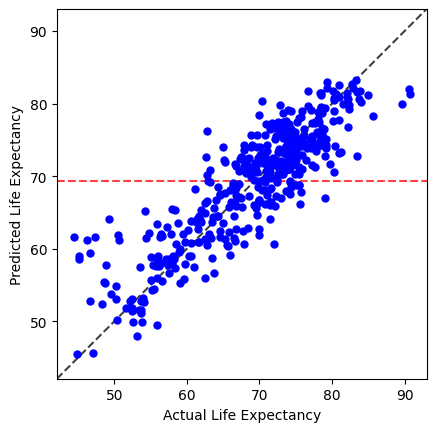

In [1747]:
fig, ax = plt.subplots()
ax.scatter(life_y_validation, life_y_validation_pred, s=25, color='blue', zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(life_y_training),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()




> <span style="font-size:1em;">✔</span> **Observations:**
> - The model demonstrates a fair ability to estimate life expectancy for new data.
> - The model's predictions are more accurate than a simple model based on the average life span (shown by the red line).
> - The model predicts life expectancy with a positive correlation to actual values.
> - Prediction accuracy decreases as actual life expectancy increases.
> - The model tends to overestimate life expectancy.

Let's obtain quantitative values of performance.

### Regression Evaluation Metrics


- MAE: Easiest to understand, direct average error.
- MSE: Popular for penalizing larger errors more severely.
- RMSE: Most popular, interpretable in "y" units, sensitive to large errors
*These MAE, MSE, RMSE represent loss functions and we want to minimize them.


- R-squared: Indicates model fit, higher is better, different from the others as it's a measure of variance explained, not an error metric.

**Evaluation Methods Justification**

- R-squared is suitable for evaluating life expectancy predictions because it shows the proportion of variance in the life expectancy that our model accounts for. A higher R-squared value means better model performance.

- Mean Squared Error (MSE) works well as an evaluation metric in life expectancy prediction because it measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model, emphasizing the impact of large errors. Lower MSE values are preferable as they indicate higher prediction accuracy.

- Together, they provide a clear picture of the model's explanatory power and predictive accuracy, essential in the critical context of life expectancy estimation.

If MSE is high: It indicates that the model's predictions are far off from the actual values. We might need to revisit the model's complexity, the features used, or consider a different model altogether.

If R² is low: This suggests that the model doesn't explain much of the variance in the target variable. An R² closer to 1 means the model fits the data well.



In [1748]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming life_y_validation and life_y_validation_pred are already defined
r2_lr = r2_score(life_y_validation, life_y_validation_pred)
print('The R^2 score for the linear regression model is: {:.3f}'.format(r2_lr))

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(life_y_validation, life_y_validation_pred)
print('The Mean Squared Error for the linear regression model is: {:.3f}'.format(mse_lr))

The R^2 score for the linear regression model is: 0.762
The Mean Squared Error for the linear regression model is: 19.690


Around 72% of the variance in the target variable is explained by the model, which is quite decent. However, there is still a room to improve the model

## Residual plots

<ipython-input-1749-46a1bddfa920>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(xlims, [0.0,]*2, 'r--', alpha=0.75, zorder=0, color='red')  # Changed to red dashed line


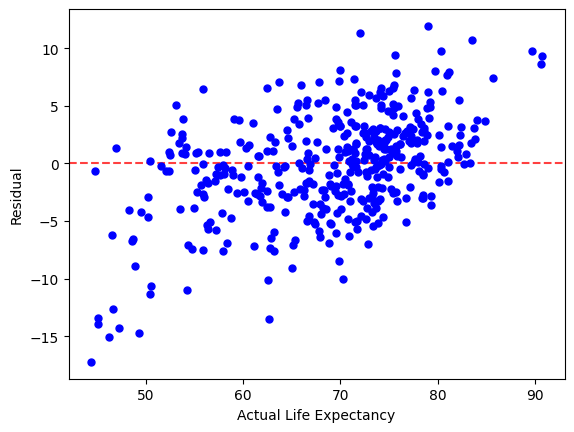

In [1749]:
fig, ax = plt.subplots()
ax.scatter(life_y_validation, life_y_validation-life_y_validation_pred, s=25, color='blue', zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'r--', alpha=0.75, zorder=0, color='red')  # Changed to red dashed line
ax.set_xlim(xlims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residual')

plt.show()


### Observations:
Model Strengths:
  - The residuals are centered around zero, indicating no systematic bias in predictions.
  - The residuals are spread on both sides of the zero line, showing a good balance of over and under predictions.

What needs to be changed to improve the model:

  - The presence of patterns in residuals suggests the model may not fully capture all the influential factors or complex relationships.
  - Some large negative residuals indicate the model significantly underpredicts in some cases, which may require further investigation and model refinement.

Hence, the model is generally effective but could benefit from non-linear approaches like Polynomial Regression or feature engineering to enhance its predictions.

## Feature importance

**Permutation feature**

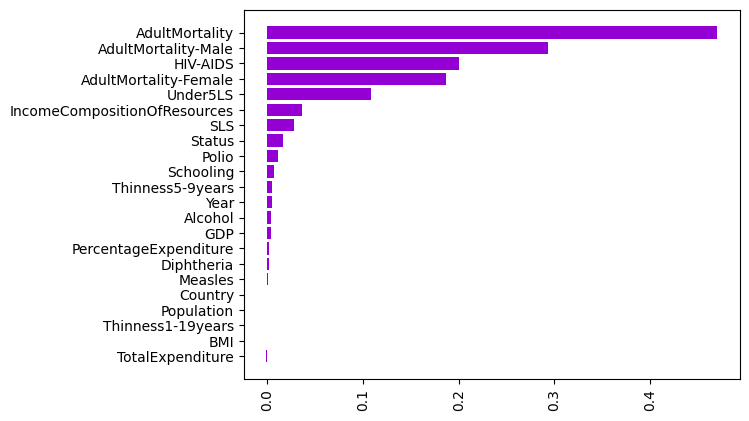

In [1750]:
from sklearn.inspection import permutation_importance


r = permutation_importance(model_lr, life_X_validation_scaled, life_y_validation, n_repeats=30)
inx = np.argsort(r.importances_mean)

plt.barh(life_X_validation_scaled.columns[inx], r.importances_mean[inx], color='darkviolet')
plt.xticks(rotation='vertical')
plt.show()




## Observations:
> - **High Importance:** Features such as "AdultMortality," "AdultMortality-Male," "HIV-AIDS," and "AdultMortality-Female" show the highest importance in the model, suggesting a strong impact on life expectancy predictions.

> - **Moderate Importance:** Features like "IncomeCompositionOfResources" and "Under5LS" exhibit moderate importance, indicating a noticeable but lesser influence on life expectancy compared to the top features.

> - **Low Importance:** "BMI" and "TotalExpenditure" are among the features with the lowest importance, which may indicate a relatively minor role in the model's life expectancy predictions.

**Coefficient Importance**

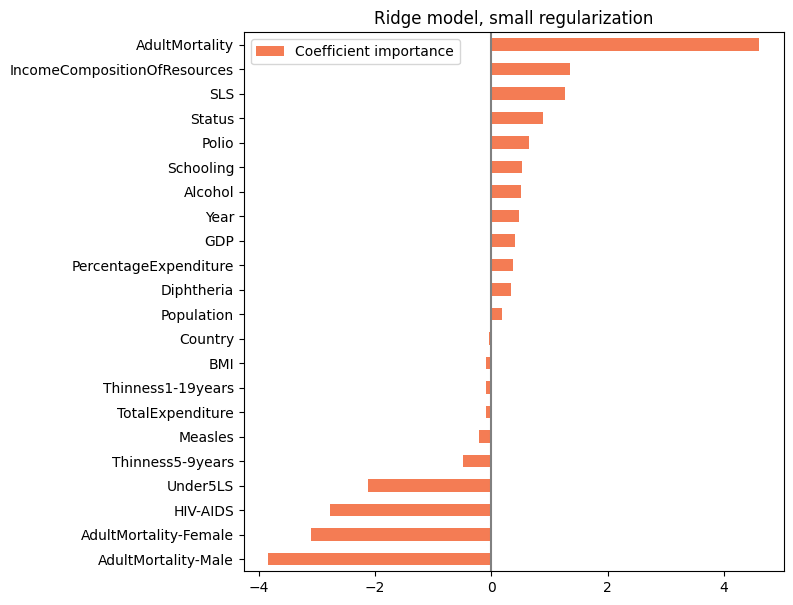

In [1751]:
coefs = pd.DataFrame(
    model_lr.coef_  * life_X_training_scaled.std(axis=0),
    columns=['Coefficient importance'], index=life_X_training_scaled.columns
)
coefs.sort_values(by=['Coefficient importance']).plot(kind='barh', figsize=(9, 7), color='#f47c54' )
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

> <span style="font-size:1em;">✔</span> **Observations:**
> - **IncomeCompositionOfResources & Schooling**: These have the highest positive coefficients, suggesting they're strong predictors for higher life expectancy.`Higher education and better resource distribution are linked to longer life expectancy.`
> - **Status:** This has a positive coefficient too.`Being from a developed country is positively associated with a longer life`
> - **Health indicators such as "Polio" and "Diphtheria" vaccinations, along with "GDP"**, have positive but smaller coefficients. Higher figures in these areas are modestly correlated with better life expectancy.
`Greater GDP and immunization coverage modestly increase life expectancy`
> -  **PercentageExpenditure & Country:** These have coefficients close to zero, suggesting they have little to no linear predictive power on life expectancy **within** this model.
> -  **Predictors like "Population" and "Thinness"** metrics have negative coefficients, suggesting that `higher numbers in these categories may be related to lower life expectancy`
> - **The largest negative coefficients are associated with "HIV-AIDS" and "AdultMortality" metrics.** `A higher prevalence or rate in these predictors correlates strongly with lower life expectancy`, highlighting their critical impact on health outcomes.



# Tuning Model

# K-Fold Cross Validation

Although we have implemented a form of hold-out validation, Using cross-validation in addition to the current train-validation split can enhance model evaluation, help use all data effectively, and improve the overall robustness and accuracy of the linear regression model

## Apply regularisation

Regularisation is the process of adding information to a model in order to prevent overfitting. This is important in order to boost the evaluation metrics

While feature selection is not allowed in baseline model, regularization (like L1 or L2 regularization) can be used. Regularization methods can inherently perform a type of feature selection by penalizing large weights, thus some features can have their impact minimized within the model without being explicitly removed. This is a way to deal with potentially redundant or less important features while complying with the assignment's restrictions.

We use regularisation because some of the features in our data are correlated.

### Regularization using Ridge Regression and Grid Search

Decide between using Ridge and Lasso

In [1752]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

# Define the models
ridge_model = Ridge()
lasso_model = Lasso()

# Perform 5-fold cross-validation and calculate mean MSE for each model
cv_folds = 5
ridge_scores = cross_val_score(ridge_model, life_X_training_scaled, life_y_training, cv=cv_folds, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_model, life_X_training_scaled, life_y_training, cv=cv_folds, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the MSE for each model
ridge_mean_mse = -ridge_scores.mean()
lasso_mean_mse = -lasso_scores.mean()
ridge_std_mse = ridge_scores.std()
lasso_std_mse = lasso_scores.std()

(ridge_mean_mse, ridge_std_mse, lasso_mean_mse, lasso_std_mse)


(18.410461626065317,
 1.5571131637656501,
 22.385044438559213,
 1.8850499279617006)

I found that Ridge has better performance when I tried using cross-validation to validate. Ridge model has lower mean MSE, which indicates Ridge Regression's predictions are closer to the actual values. So, I decided to use Ridge in the next model

Hyperparameter Tuning: While you've applied Ridge regression, further optimization of the Ridge model can be achieved by tuning its hyperparameters, notably the regularization strength alpha. Utilising GridSearchCV or RandomizedSearchCV to find the optimal alpha value can lead to better model performance.

In my case, I decided to use Ridge Regression and utilise GridSearch.

Model 1.2: Linear Ridge Regression

In [1753]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Create a Ridge regression model
ridge = Ridge()

# Setup the grid search
grid_search = GridSearchCV(ridge, param_grid, cv=cv_folds, scoring='neg_mean_squared_error', return_train_score=True)

# Perform the grid search on the training data
grid_search.fit(life_X_training_scaled,life_y_training)

# Extract the best model and its performance metrics
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_
best_params = grid_search.best_params_

(best_score, best_params)


(18.410461626065317, {'alpha': 1})

Best Alpha = 1

Adjust the alpha parameter to balance the trade-off between bias and variance.

In [1754]:
from sklearn.linear_model import Ridge

# Combine the training and validation sets for final model training
X_full = pd.concat([life_X_training, life_X_validation])
y_full = pd.concat([life_y_training, life_y_validation])

# Retrain the model on the full dataset with the identified optimal parameters
ridge_final_model = Ridge(alpha= 1 )  # Using the optimal alpha value identified earlier
ridge_final_model.fit(X_full, y_full)

# Since the model is now trained on the full dataset, calculate mse and r^2 for the combined data as a self-check
y_full_pred = ridge_final_model.predict(X_full)

# Calculate performance metrics
mse_full = mean_squared_error(y_full, y_full_pred)
r2_full = r2_score(y_full, y_full_pred)

print(f"MSE for the full dataset: {mse_full}")
print(f"R^2 for the full dataset: {r2_full}")


MSE for the full dataset: 21.714036153648905
R^2 for the full dataset: 0.7583845847403055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.86781e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Model 2: Polynomial Regression


Polynomial regression can capture more complex relationships between the features and the target variable than linear regression by adding polynomial terms, allowing it to model nonlinear phenomena within the data. This makes it a suitable choice for scenarios where the relationship between variables isn't strictly linear, enhancing model flexibility and accuracy in predicting outcomes.

### Handling outliers

Remove outliers and fill with mean value

In [1755]:
train_df = train_df[
    (train_df["TARGET_LifeExpectancy"] >= lower) &
    (train_df["TARGET_LifeExpectancy"] <= upper)
].fillna(train_df.mean())


In [1756]:
train_df = train_df[
    (train_df["AdultMortality"] >= lower) &
    (train_df["AdultMortality"] <= upper)
].fillna(train_df.mean())

In [1757]:
train_df = train_df[
    (train_df["GDP"] >= lower) &
    (train_df["GDP"] <= upper)
].fillna(train_df.mean())

In [1758]:
train_df = train_df[
    (train_df["Population"] >= lower) &
    (train_df["Population"] <= upper)
].fillna(train_df.mean())

### Remove Columns that are perfectly correlated with other features

Remove AdultMortality_Male and AdultMortality_Female.Since these two features are perfectly linearly correlated with AdultMortality(correlation coefficient = 1), they will provide identical information.

In [1759]:
# prompt: drop AdultMortality_Male and AdultMortality_Female before using polynomial regression

life_X_training_scaled = life_X_training_scaled.drop(columns=['AdultMortality-Male', 'AdultMortality-Female'])
life_X_validation_scaled = life_X_validation_scaled.drop(columns=['AdultMortality-Male', 'AdultMortality-Female'])

Remove Under5LS because this feature is perfectly linearly correlated with SLS(correlation coefficient = 1), they will provide identical information.

In [1760]:
# prompt: drop AdultMortality_Male and AdultMortality_Female before using polynomial regression

life_X_training_scaled = life_X_training_scaled.drop(columns=['Under5LS'])
life_X_validation_scaled = life_X_validation_scaled.drop(columns=['Under5LS'])

Drop Country because the model might inaccurately interpret it as a continuous variable

In [1761]:
# prompt: drop AdultMortality_Male and AdultMortality_Female before using polynomial regression

life_X_training_scaled = life_X_training_scaled.drop(columns=['Country'])
life_X_validation_scaled = life_X_validation_scaled.drop(columns=['Country'])

Model 2.1: Polynomial Regression Model

In [1762]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
life_X_train_poly = poly.fit_transform(life_X_training_scaled)
life_X_val_poly = poly.transform(life_X_validation_scaled)

# Training the model
model_poly = LinearRegression().fit(life_X_train_poly, life_y_training)

# Making predictions on the validation set
life_y_validation_pred_poly = model_poly.predict(life_X_val_poly)

# Evaluating the model
r2_poly = r2_score(life_y_validation, life_y_validation_pred_poly)
mse_poly = mean_squared_error(life_y_validation, life_y_validation_pred_poly)

print(f"Polynomial Regression R²: {r2_poly}")
print(f"Polynomial Regression MSE: {mse_poly}")


Polynomial Regression R²: 0.8479122181031105
Polynomial Regression MSE: 12.565623376876479


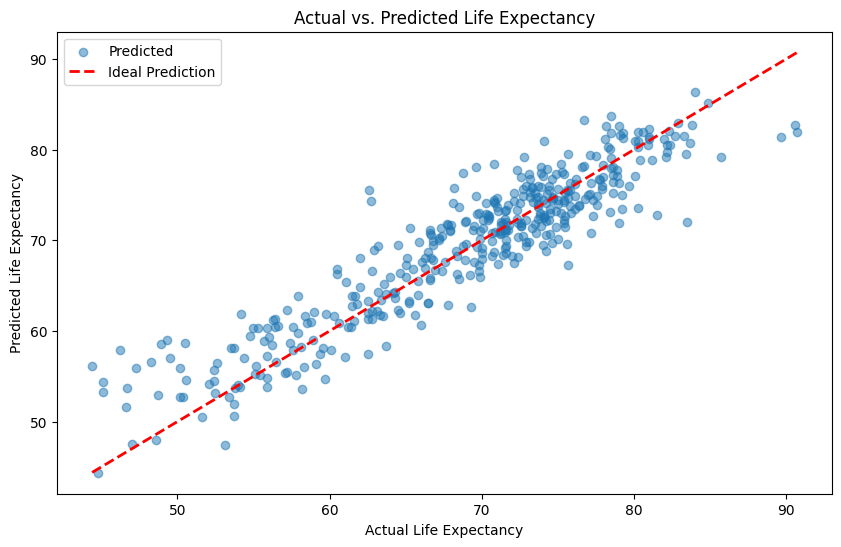

In [1763]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(life_y_validation, life_y_validation_pred_poly, alpha=0.5, label='Predicted')
plt.title('Actual vs. Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Plotting the identity line - ideal predictions
ideal_values = np.linspace(min(life_y_validation), max(life_y_validation), 100)
plt.plot(ideal_values, ideal_values, color='red', lw=2, linestyle='--', label='Ideal Prediction')

plt.legend()
plt.show()

Model 2.2: Polynomial Ridge Regression Model

In [1764]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(life_X_training_scaled)
X_val_poly = poly.transform(life_X_validation_scaled)

# Initialize Ridge Regression model
model_ridge = Ridge(alpha=100)  # Adjust alpha as necessary

# Train the model
model_ridge.fit(X_train_poly, life_y_training)

# Predict on the validation set
y_val_pred_ridge = model_ridge.predict(X_val_poly)

# Evaluate the model
mse_ridge = mean_squared_error(life_y_validation, y_val_pred_ridge)
r2_ridge = r2_score(life_y_validation, y_val_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, R^2: {r2_ridge}")


Ridge Regression MSE: 12.451956235744712, R^2: 0.8492879861689515


Optimize the Degree of Polynomial Features

In [1765]:
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(life_X_training_scaled)
    X_val_poly = poly.transform(life_X_validation_scaled)

    model_ridge = Ridge(alpha=100).fit(X_train_poly, life_y_training)
    y_val_pred_ridge = model_ridge.predict(X_val_poly)

    mse = mean_squared_error(life_y_validation, y_val_pred_ridge)
    r2 = r2_score(life_y_validation, y_val_pred_ridge)

    print(f"Degree: {degree}, MSE: {mse}, R^2: {r2}")


Degree: 1, MSE: 22.119178342628146, R^2: 0.7322809485359367
Degree: 2, MSE: 12.451956235744712, R^2: 0.8492879861689515
Degree: 3, MSE: 18.86761236059273, R^2: 0.7716362151285341
Degree: 4, MSE: 114.55373700643078, R^2: -0.38649896203067957


I found that degree = 2 gives the highest R^2 and lowest MSE, which indicates the best performance.

Optimize Alpha

In [1766]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Define the polynomial features
poly = PolynomialFeatures(degree=2)

# Apply polynomial transformation to the training data
X_train_poly = poly.fit_transform(life_X_training_scaled)

# Initialize Ridge Regression model
ridge = Ridge()

# Define the parameter grid
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Create the grid search with R^2 scoring
grid_search_r2 = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)

# Fit the grid search
grid_search_r2.fit(X_train_poly, life_y_training)

# Get the best alpha
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print(f"Best Alpha for R^2: {best_alpha_r2}")



Best Alpha for R^2: 51.79474679231202


In [1767]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(life_X_training_scaled)
X_val_poly = poly.transform(life_X_validation_scaled)

# Initialize Ridge Regression model
model_ridge = Ridge(alpha= 51.94)  # Adjust alpha as necessary

# Train the model
model_ridge.fit(X_train_poly, life_y_training)

# Predict on the validation set
y_val_pred_ridge = model_ridge.predict(X_val_poly)

# Evaluate the model
mse_ridge = mean_squared_error(life_y_validation, y_val_pred_ridge)
r2_ridge = r2_score(life_y_validation, y_val_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, R^2: {r2_ridge}")


Ridge Regression MSE: 12.275032794622055, R^2: 0.8514293756503063


I found that alpha = 51.7947 gives the highest R^2 and lowest MSE, which indicates the best performance.

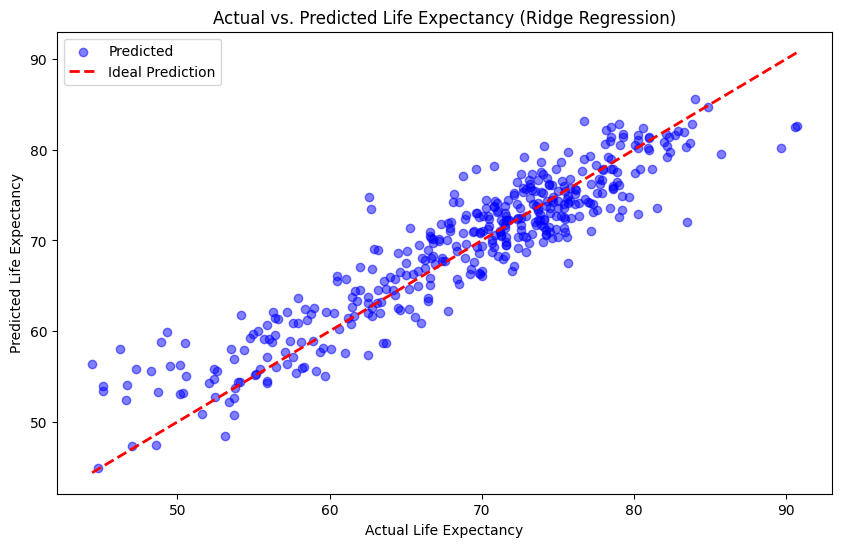

In [1768]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(life_y_validation, y_val_pred_ridge, alpha=0.5, label='Predicted', color='blue')
plt.title('Actual vs. Predicted Life Expectancy (Ridge Regression)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Ideal prediction line
ideal_values = np.linspace(min(life_y_validation), max(life_y_validation), 100)
plt.plot(ideal_values, ideal_values, color='red', lw=2, linestyle='--', label='Ideal Prediction')

plt.legend()
plt.show()

Observations:

- The bulk of predictions are clustered around the ideal line, especially where life expectancy is between 50 and 90 years, suggesting that the model predicts with reasonable accuracy in this range.
- There are some deviations from the ideal, particularly noticeable at lower actual life expectancies, where the model tends to overpredict.
- The spread of predictions around the ideal line increases as actual life expectancy decreases, indicating less precision in the model for lower life expectancies.
- Overall, the model seems more accurate for higher life expectancies than for lower ones.

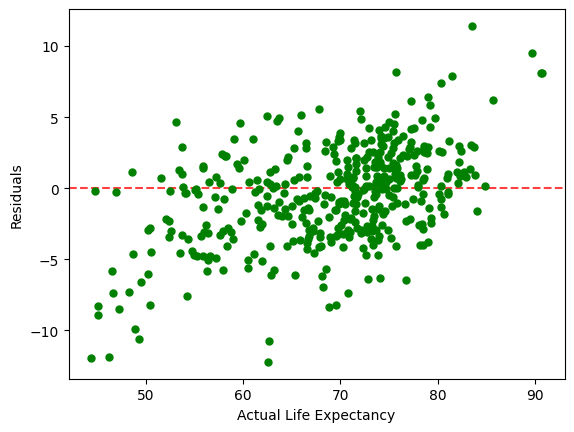

In [1769]:
import matplotlib.pyplot as plt


# Calculate residuals for Ridge model
residuals_ridge = life_y_validation - y_val_pred_ridge

# Create the plot
fig, ax = plt.subplots()
ax.scatter(life_y_validation, residuals_ridge, s=25, color='green', zorder=10)

# Plot a horizontal red dashed line at y = 0 to indicate no residual
xlims = ax.get_xlim()
ax.plot(xlims, [0.0, 0.0], '--', color='red', alpha=0.75, zorder=0)

# Set the limits back to the data limits after plotting the line
ax.set_xlim(xlims)

# Label the axes
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')

# Display the plot
plt.show()


Observations:

- The residuals are mostly scattered around the zero line, indicating that for many predictions, the model is quite accurate.
- There is no clear pattern in the residuals as they are randomly dispersed, suggesting the model's errors are not systematic across the range of life expectancies.
- However, there are some outliers, particularly for lower life expectancies (around 50 years), where the residuals are more negative, indicating underestimation.
- For higher life expectancies (closer to 90 years), the model also seems to underestimate slightly, but not as severely.
- The variance of the residuals does not appear to increase or decrease with actual life expectancy, which is a good sign that the model is consistent across different values.

# Comparing Models


I choose the **Polynomial Ridge Regression Model** because of its **higher R² score and lower MSE indicates** it fits the data better and makes more accurate predictions than the Linear Regression Model. A higher R² signifies that the model explains a greater proportion of the variance in the target variable, while a lower MSE points to less error in the predictions, making it a more reliable model for forecasting or understanding the relationships within the data.

# Prediction

In [1770]:
life_X_test = test_df

Apply Scaling to Test data as well

In [1771]:
# Make a copy of the test dataset for scaling to ensure the original data remains unchanged
life_X_test_scaled = life_X_test.copy()

# Scale the standard attributes using the StandardScaler fitted on the training data
life_X_test_scaled[standard_attributes] = standardscaler.transform(life_X_test_scaled[standard_attributes])

# Transform the log normalization attributes using the PowerTransformer fitted on the training data
life_X_test_scaled[logNorm_attributes] = powertransformer.transform(life_X_test_scaled[logNorm_attributes])

# Now, life_X_test_scaled is ready for further processing, such as polynomial feature transformation and making predictions



In [1772]:
life_X_test_scaled = life_X_test_scaled.drop(columns=['AdultMortality-Male', 'AdultMortality-Female', 'Country','Under5LS'])

In [1773]:
life_X_test_scaled = life_X_test_scaled.drop(columns=['ID'])

In [1774]:
# Transform 'life_X_test_scaled' to polynomial features
life_X_test_poly = poly.transform(life_X_test_scaled)

In [1775]:
# Assuming 'test_df_scaled_poly' is the preprocessed test data ready for prediction
life_expectancy_predictions = model_ridge.predict(life_X_test_poly)

# The 'life_expectancy_predictions' now contains the predicted life expectancy values for the test data
print(life_expectancy_predictions)

[58.46767511 58.18287026 57.68535132 56.16000624 56.2125013  54.33966495
 54.59949734 54.4504642  54.60795024 53.31915608 52.03321249 53.08086655
 52.61845915 53.09878343 55.4720093  55.61894802 83.38925696 83.13605961
 83.65106294 83.46535029 84.33916841 83.67734649 82.98119211 82.85153168
 81.90875783 82.44965787 81.6200426  82.43177885 80.76303127 81.7216622
 80.39358342 78.79281883 78.28309292 80.65032552 79.39653152 76.71233211
 79.95168675 77.54122002 76.3519301  78.54163266 77.0597071  78.44960171
 77.87072726 77.53277715 77.58384409 75.43447961 74.83927899 73.64413186
 75.91595056 76.87020605 74.67492861 75.00253266 74.98525519 75.10529573
 77.57027498 77.24654099 74.67408052 74.4548454  74.02019482 73.75318083
 72.94729699 75.485451   73.00619155 74.81610668 71.24847885 71.44262066
 70.98927762 70.88645973 70.71481209 73.51848358 73.62313543 69.27666988
 68.58370735 68.31950911 67.99886783 67.43175608 71.06386341 66.00460856
 65.39179639 64.96470912 75.82205605 75.17143584 73.

#  📌 Conclusion

The choice of Polynomial Ridge Regression is justified by its high R-squared value and low mean squared error, indicating effective variance capture and accuracy in predicting life expectancy. This model adeptly addresses overfitting through Ridge Regression's regularization, essential for managing the complexity of polynomial features. Its adherence to key regression assumptions—linearity in transformed space, multicollinearity management, and preliminary indications of homoscedasticity and independent residuals—further solidifies its suitability. However, potential challenges include overfitting with high-degree polynomials and reduced interpretability. Careful polynomial degree selection and ongoing assessment of regression assumptions are crucial for maintaining the model's robustness and predictive power.


Ultimate Judgement: The best model, in my opinion, is the Polynomial Ridge Regression. The evidence supporting this judgement includes the highest R-squared value, indicating the model explains a significant portion of the variance in life expectancy from our predictors, and the lowest mean squared error, suggesting the predictions are closely aligned with the actual data. Additionally, the Ridge Regression component helps mitigate overfitting—a common issue with polynomial regression—by penalizing more complex models, which is particularly beneficial given the complexity introduced by polynomial features.

The limitation of this ultimate model is its potential to still overfit if the degree of the polynomial is set too high, especially in the presence of limited training data. Moreover, the interpretability of the model can be challenging due to the transformation of features, making it harder to draw direct, intuitive conclusions about the importance and relationships of the original features.

# 📚 Reference

- Analytics Vidhya, (2015). Several ways to improve your machine learning model's performance. Available at: https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/#:~:text=There%20are%20several%20ways%20to,bagging%2C%20boosting%2C%20and%20stacking [3 April 2024].

- Towards Data Science, (Date not provided). Polynomial Regression. Available at: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 [7 April 2024].

- Haji, S., (Date not provided). Using a Linear Regression Model to Predict Life Expectancy. Available at: https://shanzehhaji.medium.com/using-a-linear-regression-model-to-predict-life-expectancy-de3aef66ac21 [1 April 2024].

- Machine Learning Mastery, (Date not provided). Train-Test Split for Evaluating Machine Learning Algorithms. Available at: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ [28 Mar 2024].

- Natarajan, M., (Date not provided). Scaling Data Before or After Train-Test Split. Available at: https://medium.com/@megha.natarajan/scaling-data-before-or-after-train-test-split-35e9a9a7453f#:~:text=The%20Correct%20Sequence%3A%20Split%2C%20Then%20Scale&text=Imagine%20you%20have%20a%20dataset,which%20includes%20the%20test%20set [26 Mar 2024].